# Predicting the Sale Price of Bulldozers by Shoaib Hoque

In this notebook, we are going to predict the sale price of bulldozers using time series. for which, we need to follow the steps below.

## 1. Problem Definition
How well we can predict the future sale price of a bulldozer, given its characteristics and prevoius examples of how much similar bulldozers sold before.
## 2. Data
The data is dowloaded from the Kaggle Blubook for Bulldozers competition :
The data is split into three parts:

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

- SalesID: the uniue identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale
## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features
kaggle provides a data dictionary detailing all of the features of the dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Import training and validation datasets
df = pd.read_csv(r"D:\Work\Data Science\Personal\TrainAndValid.csv", low_memory=False)

In [3]:
df

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand         saledate  ...  \
0           2004                      68.0       Low  11/16/2006 0:00  ...   
1           1996                    4640.0       Low   3/26/2004 0:00  ...   
2           2001                    2838.0      High   2/26/2004 0:00  ...   
3           2001                    3486.0      High   5/19/2011 0:00  ...   
4           2007                     722.0    Medium   7/23/2009 0:00  ...   
...          ...                       ...       ...              ...  ...   
412693      2005                       NaN       NaN    3/7/2012 0:00  ...   
412694      2005                       NaN       NaN   1/28/2012 0:00  ...   
412695      2005                       NaN       NaN   1/28/2012 0:00  ...   
412696      2006                       NaN       NaN    3/7/2012 0:00  ...   
412697      2006                       NaN       NaN   1/28/2012 0:00  ...   

       Undercarriage_Pad_Width         Stick_Length                Thumb  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  NaN                  NaN   
3                          NaN                  NaN                  NaN   
4                          NaN                  NaN                  NaN   
...                        ...                  ...                  ...   
412693     None or Unspecified  None or Unspecified  None or Unspecified   
412694     None or Unspecified  None or Unspecified  None or Unspecified   
412695     None or Unspecified  None or Unspecified  None or Unspecified   
412696     None or Unspecified  None or Unspecified  None or Unspecified   
412697     None or Unspecified  None or Unspecified  None or Unspecified   

            Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0                       NaN          NaN              NaN        NaN   
1                       NaN          NaN              NaN        NaN   
2                       NaN          NaN              NaN        NaN   
3                       NaN          NaN              NaN        NaN   
4                       NaN          NaN              NaN        NaN   
...                     ...          ...              ...        ...   
412693  None or Unspecified       Double              NaN        NaN   
412694  None or Unspecified       Double              NaN        NaN   
412695  None or Unspecified       Double              NaN        NaN   
412696  None or Unspecified       Double              NaN        NaN   
412697  None or Unspecified       Double              NaN        NaN   

       Travel_Controls Differential_Type Steering_Controls  
0                  NaN          Standard      Conventional  
1                  NaN          Standard      Conventional  
2                  NaN               NaN               NaN  
3                  NaN               NaN               NaN  
4                  NaN               NaN               NaN  
...           

## Exploring the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

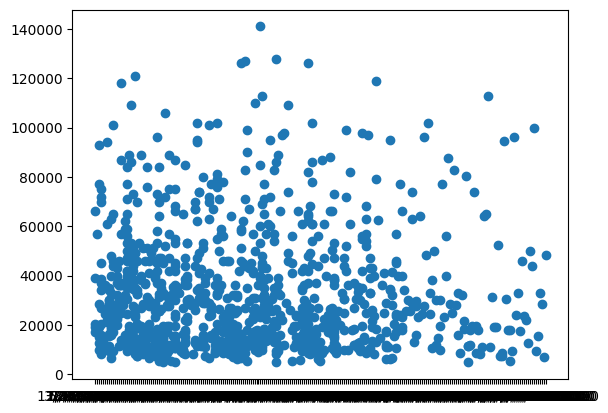

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

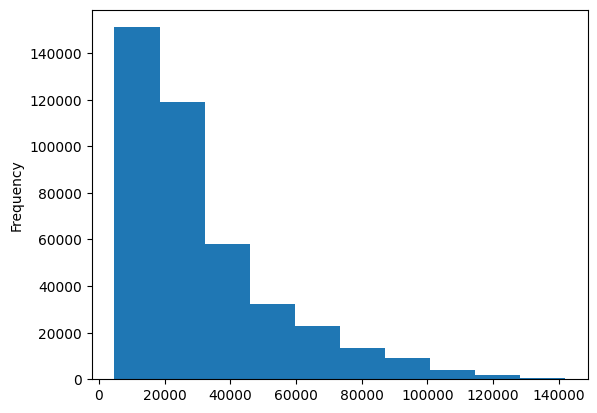

In [9]:
df['SalePrice'].plot.hist()

### Parsing Dates
when we work with time series data, we want to get the time and date component as much as possible. for which we'll using 'parse_dates' to recognize the datetime column as datetime.

In [10]:
# import data again with parsing dates this time
df = pd.read_csv(r"D:\Work\Data Science\Personal\TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=['saledate'])

In [11]:
df['saledate'][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

<Axes: xlabel='saledate', ylabel='SalePrice'>

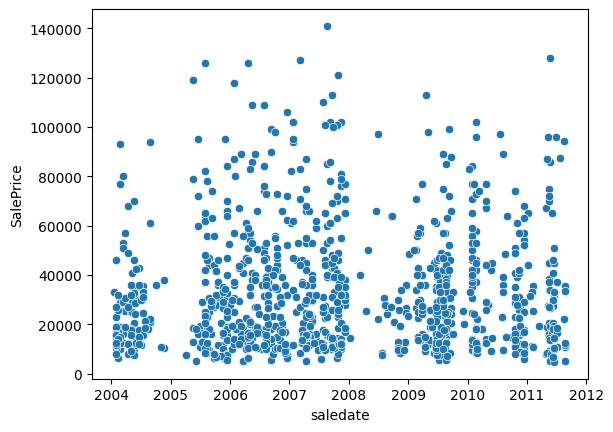

In [12]:
sns.scatterplot(x=df['saledate'][:1000], y=df['SalePrice'][:1000])

a rough idea we can get is the sales drop in the year 2005, 2008 and at some end of 2009. and the highest sales occures in 2007. and although sales increases from 2009, it didn't supasses the sales which happened between 2006 and 2008. bu its not enough to get conclusion, we need to dig deeper to understand the data.

In [13]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [14]:
df.head().T

0  \
SalesID                                                    1139246   
SalePrice                                                  66000.0   
MachineID                                                   999089   
ModelID                                                       3157   
datasource                                                     121   
auctioneerID                                                   3.0   
YearMade                                                      2004   
MachineHoursCurrentMeter                                      68.0   
UsageBand                                                      Low   
saledate                                       2006-11-16 00:00:00   
fiModelDesc                                                   521D   
fiBaseModel                                                    521   
fiSecondaryDesc                                                  D   
fiModelSeries                                                  NaN   
fiModelDescriptor                                              NaN   
ProductSize                                                    NaN   
fiProductClassDesc        Wheel Loader - 110.0 to 120.0 Horsepower   
state                                                      Alabama   
ProductGroup                                                    WL   
ProductGroupDesc                                      Wheel Loader   
Drive_System                                                   NaN   
Enclosure                                               EROPS w AC   
Forks                                          None or Unspecified   
Pad_Type                                                       NaN   
Ride_Control                                   None or Unspecified   
Stick                                                          NaN   
Transmission                                                   NaN   
Turbocharged                                                   NaN   
Blade_Extension                                                NaN   
Blade_Width                                                    NaN   
Enclosure_Type                                                 NaN   
Engine_Horsepower                                              NaN   
Hydraulics                                                 2 Valve   
Pushblock                                                      NaN   
Ripper                                                         NaN   
Scarifier                                                      NaN   
Tip_Control                                                    NaN   
Tire_Size                                      None or Unspecified   
Coupler                                        None or Unspecified   
Coupler_System                                                 NaN   
Grouser_Tracks                                                 NaN   
Hydraulics_Flow                                                NaN   
Track_Type                                                     NaN   
Undercarriage_Pad_Width                                        NaN   
Stick_Length                                                   NaN   
Thumb                                                          NaN   
Pattern_Changer                                                NaN   
Grouser_Type                                                   NaN   
Backhoe_Mounting                                               NaN   
Blade_Type                                                     NaN   
Travel_Controls                                                NaN   
Differential_Type                                         Standard   
Steering_Controls                                     Conventional   

                                                                 1  \
SalesID                                                    1139248   
SalePrice                                                  57000.0   
MachineID                                                   117657   
Mode

### Sorting the Dataframe by saledate
It's a good idea to sort the dataframe by date when we work on time series data.

In [15]:
# Sort Dataframe in Date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [16]:
df['saledate'][:20]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Feature Engineering
### Make a copy of original Dataframe
We make a copy of the original dataframe so when we manipulate the copy, we're still got our original data

In [17]:
# Make a copy
df_tmp = df.copy() 

add datetime parameters for saledate column

In [18]:
df_tmp['saleYear']= df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.day_of_week
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.day_of_year

In [19]:
df_tmp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

as we've enriched the dataframe with datetime features, now we can remove the saledate column from dataframe

In [20]:
df_tmp.drop('saledate', axis=1, inplace=True)

### EDA

C:\Users\Shoaib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:05 -> (00:00 left)



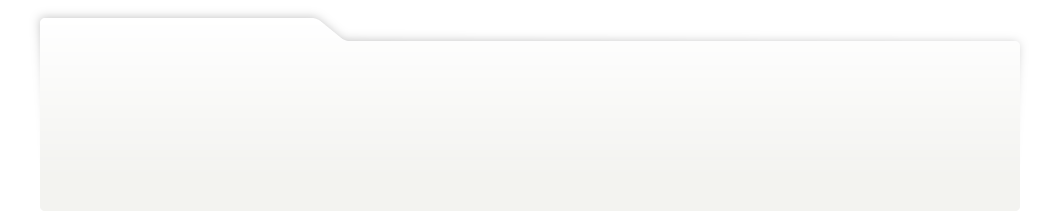
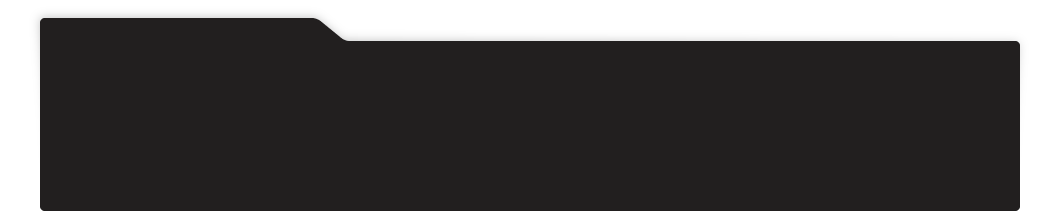
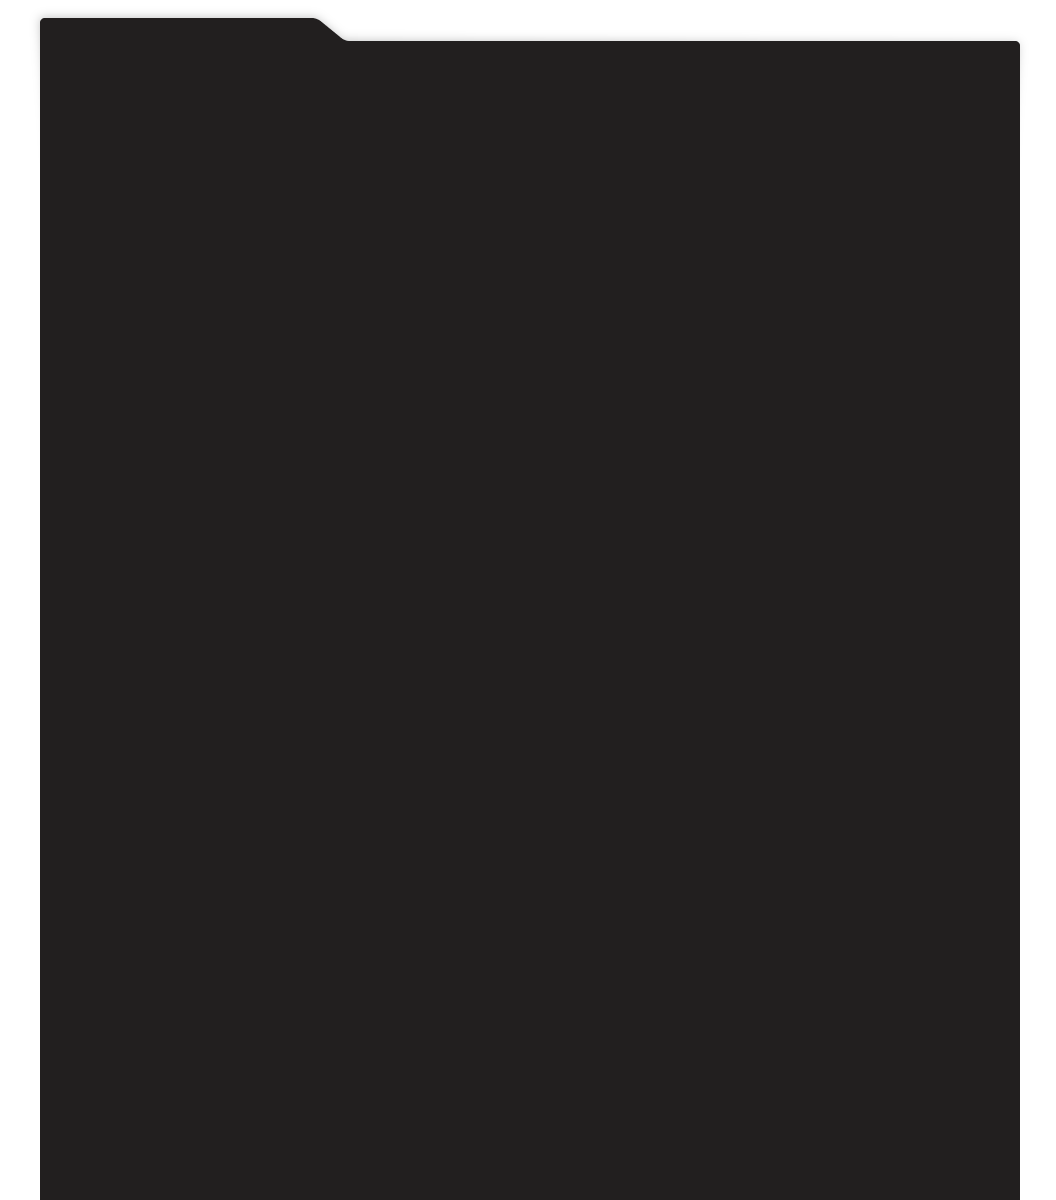
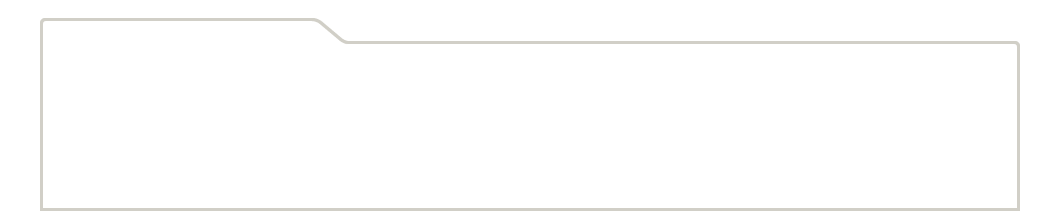
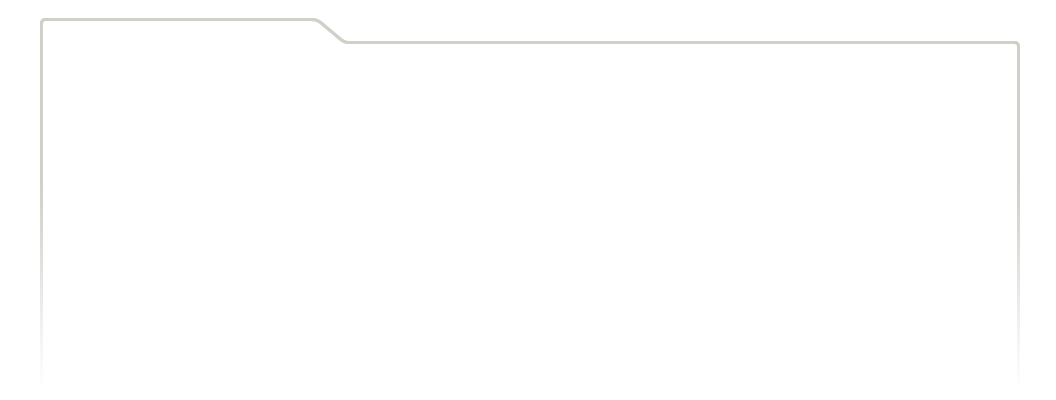
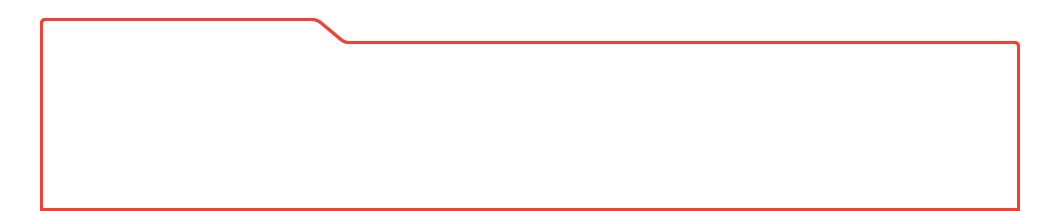
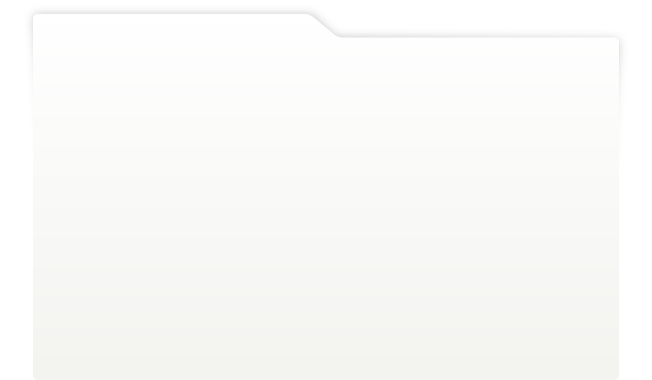
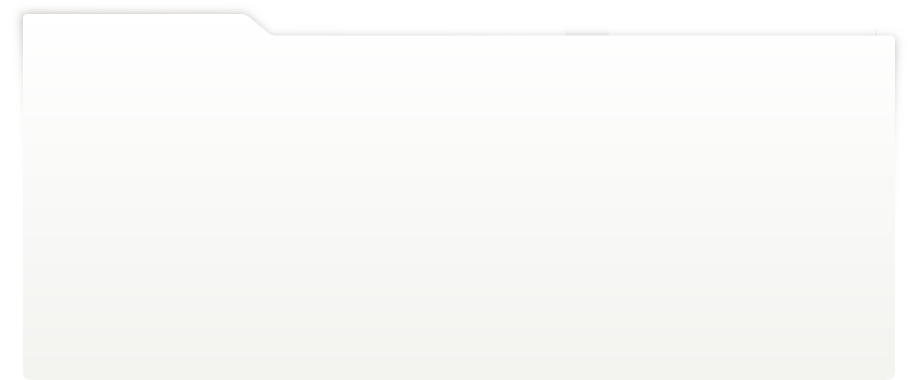
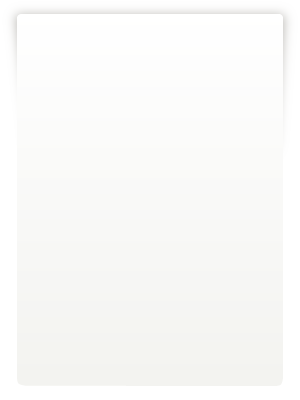
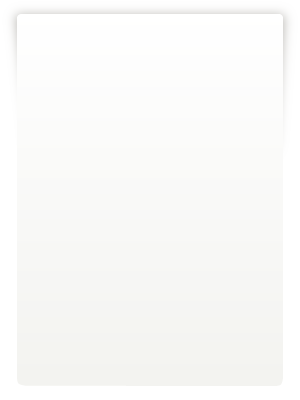
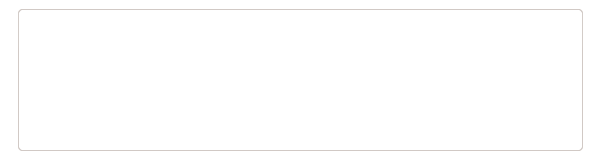
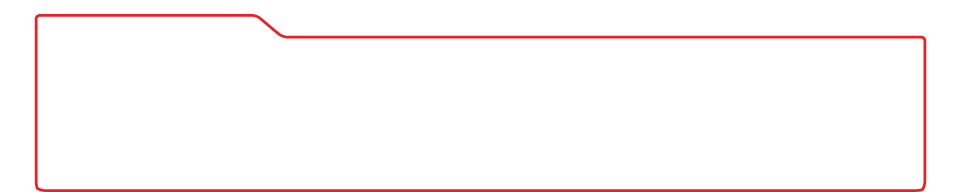
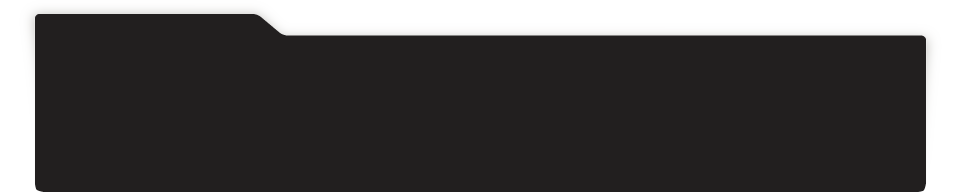
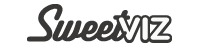
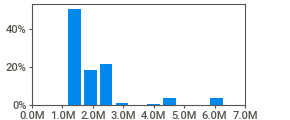
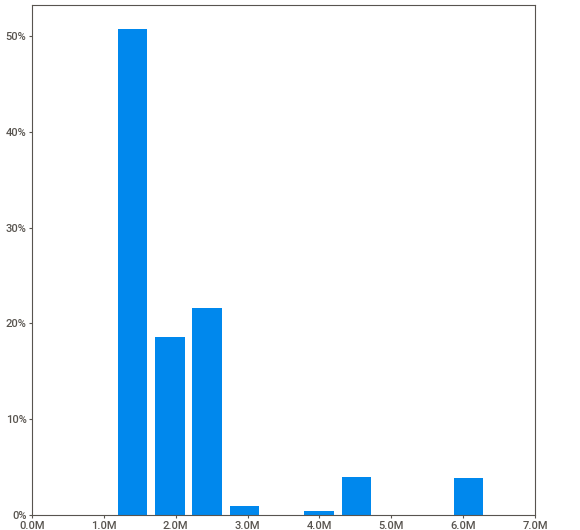
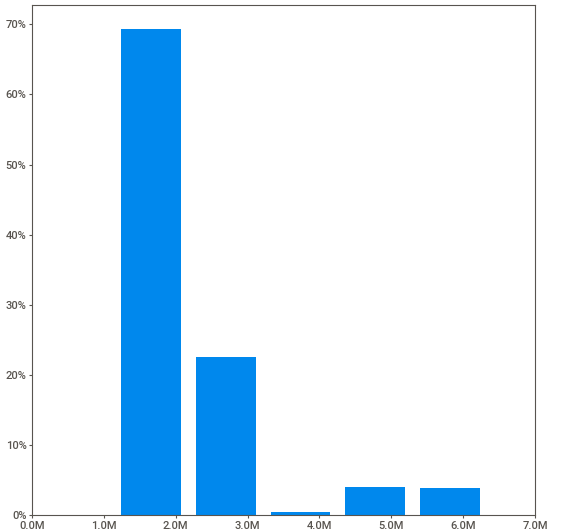
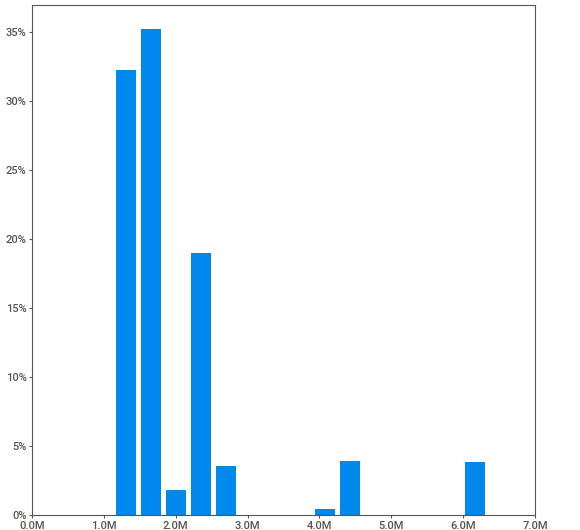
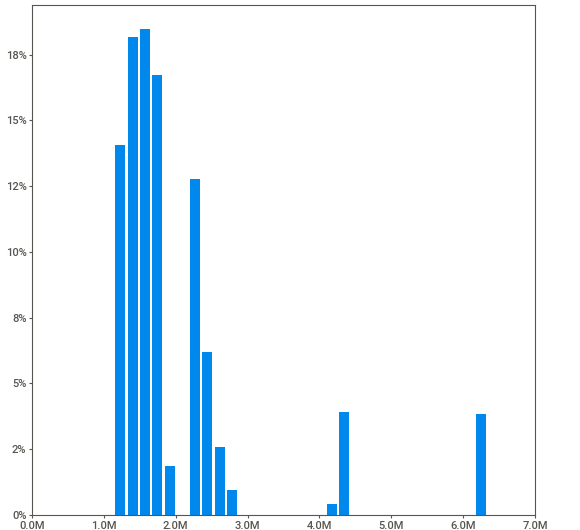
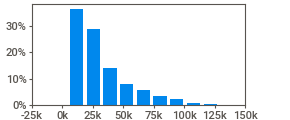
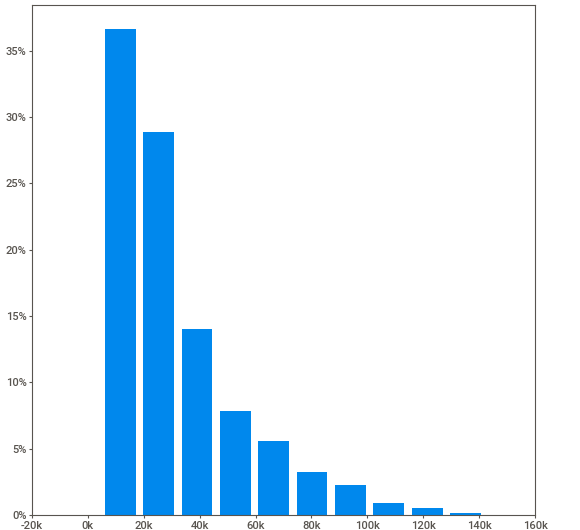
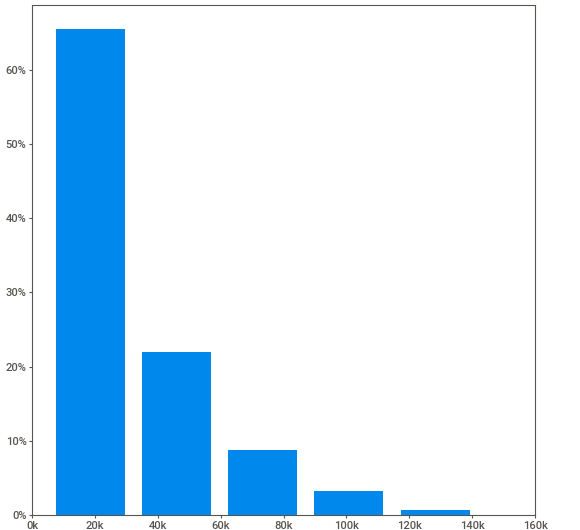
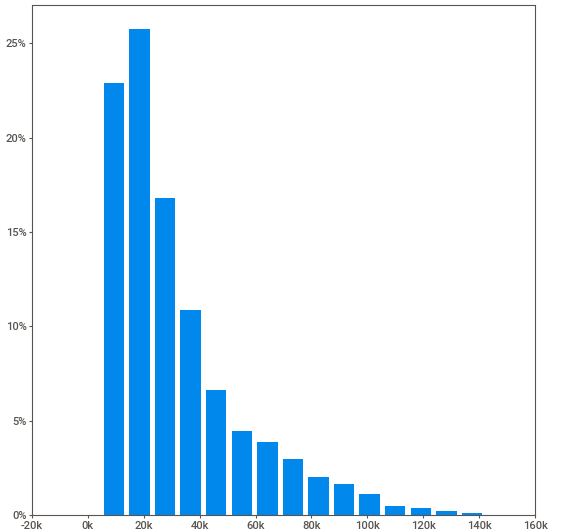
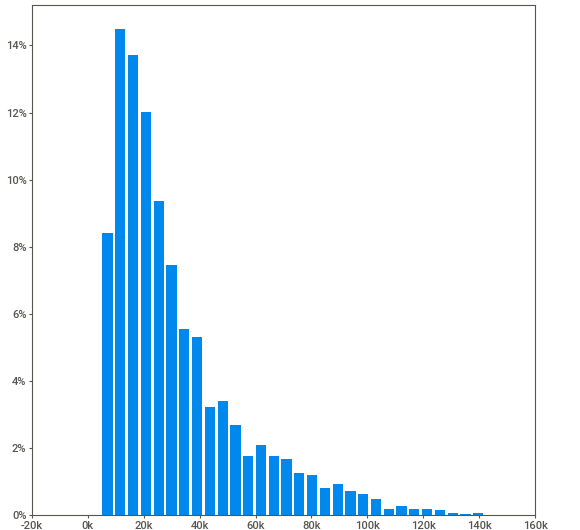
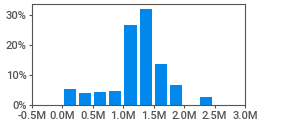
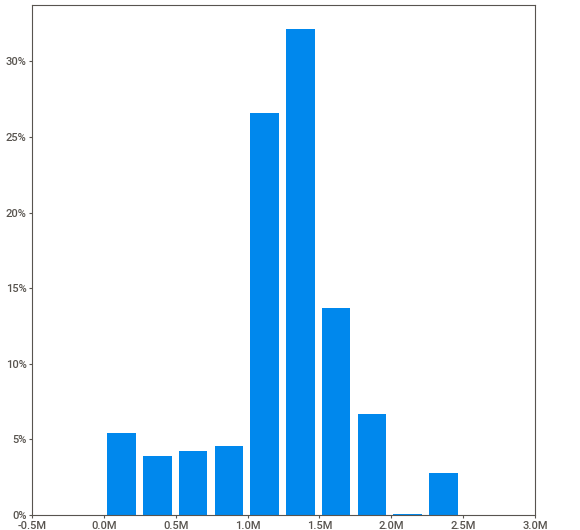
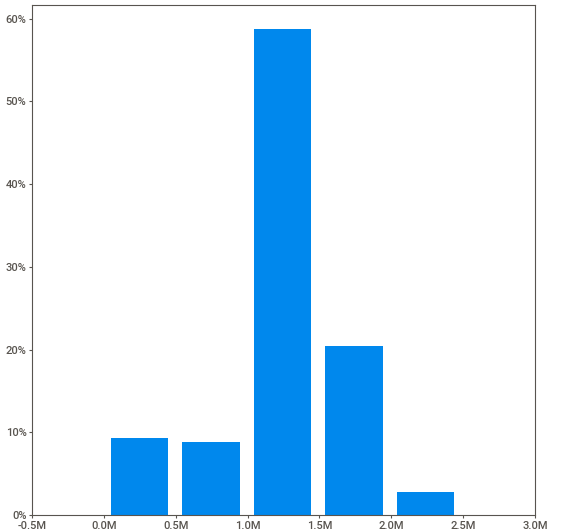
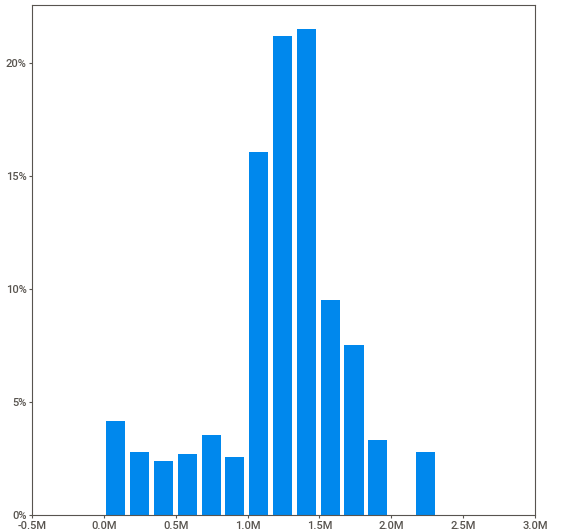
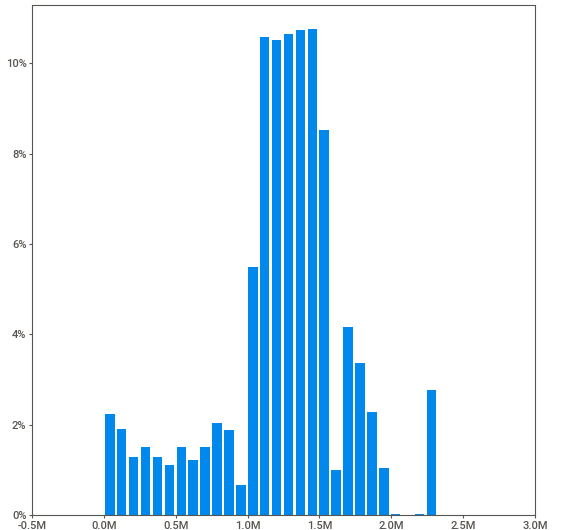
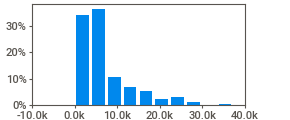
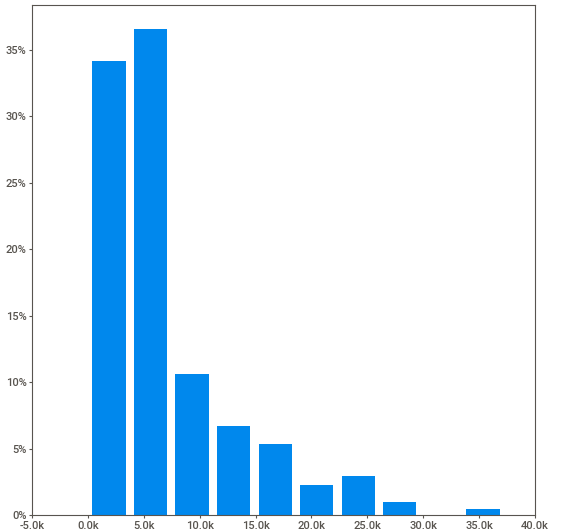
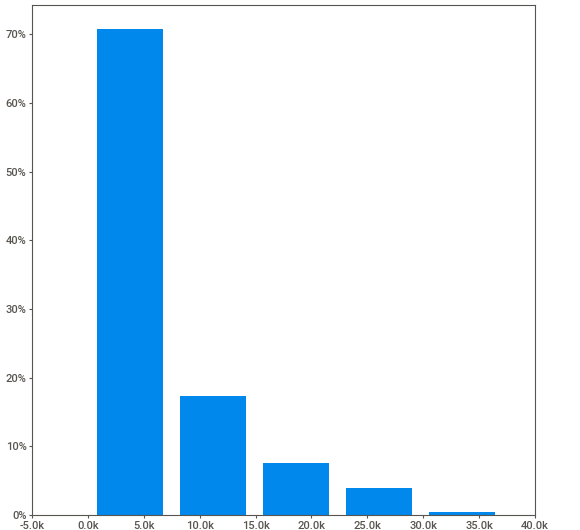
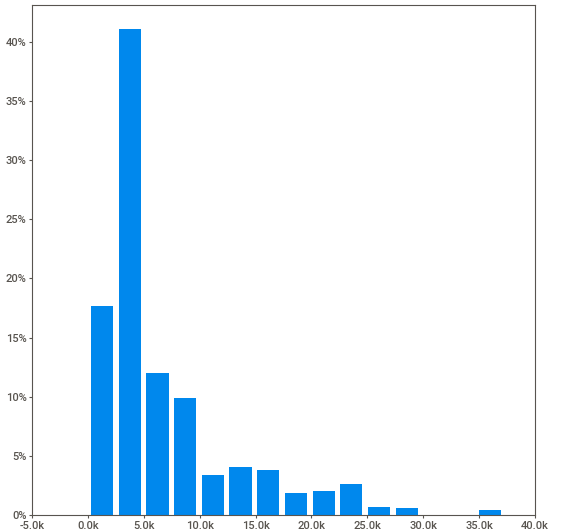
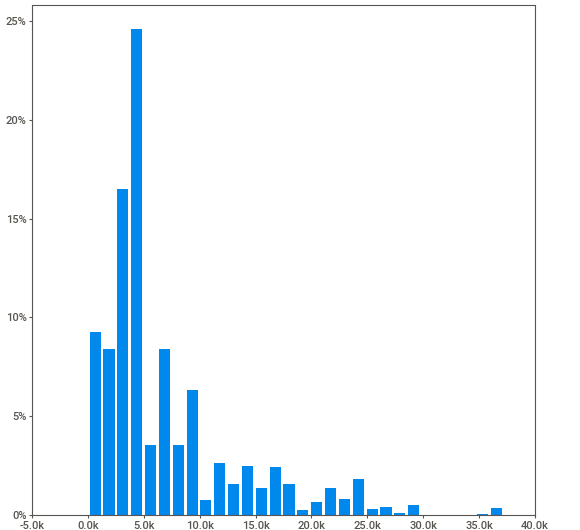
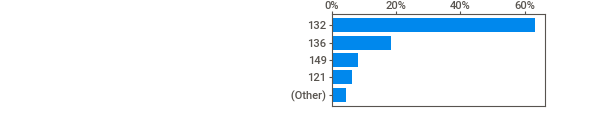
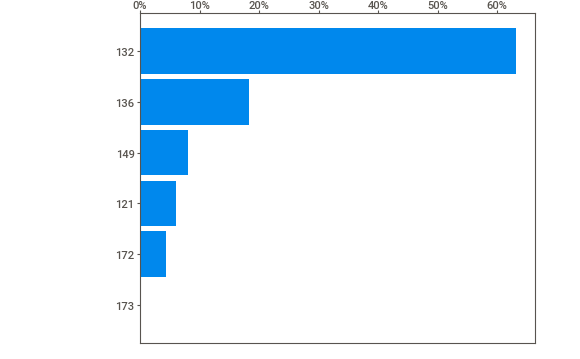
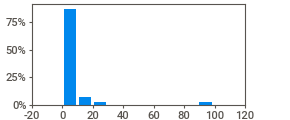
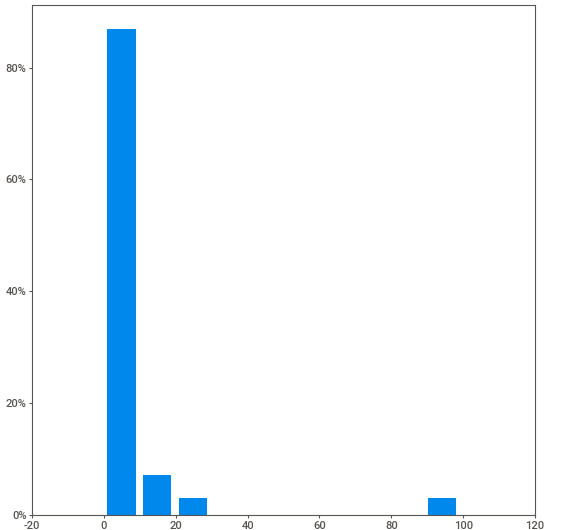
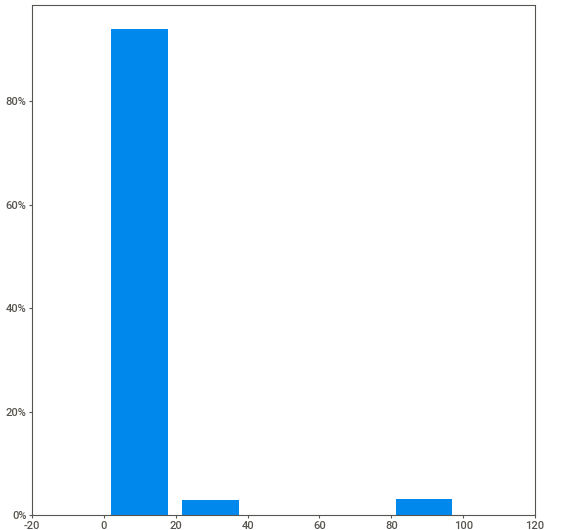
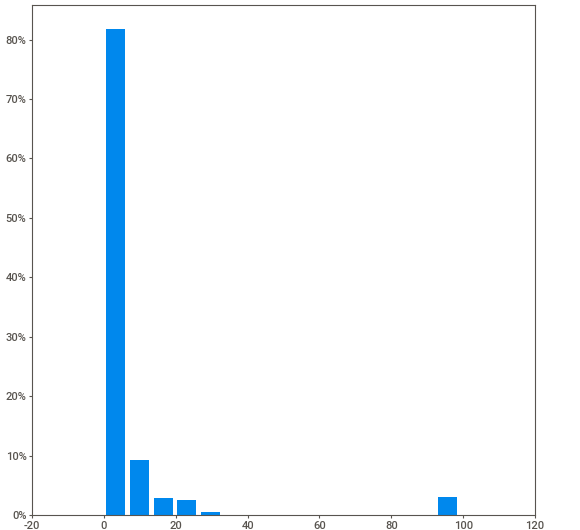
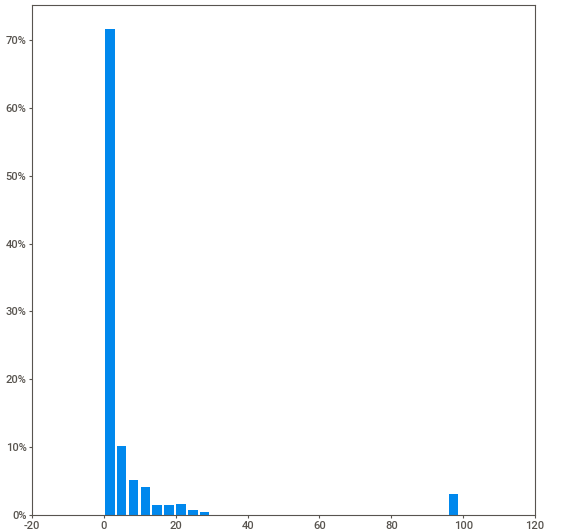
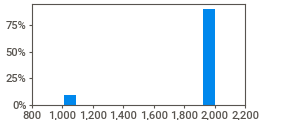
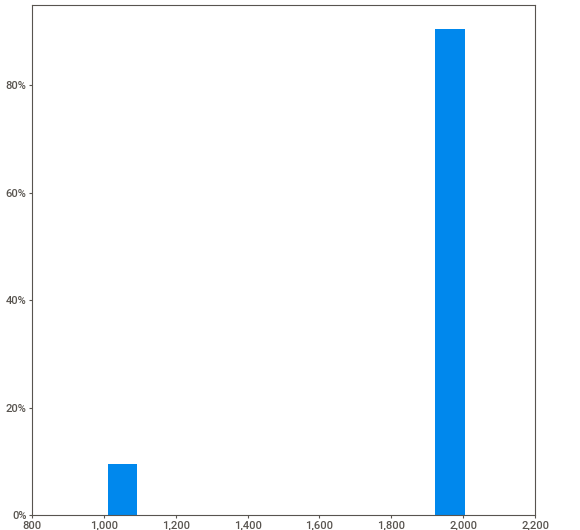
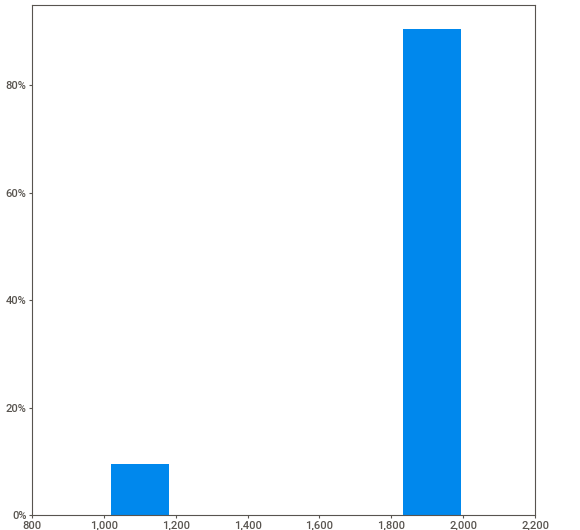
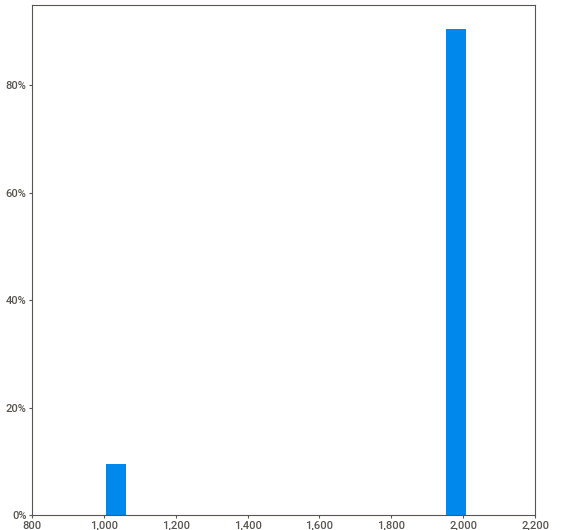
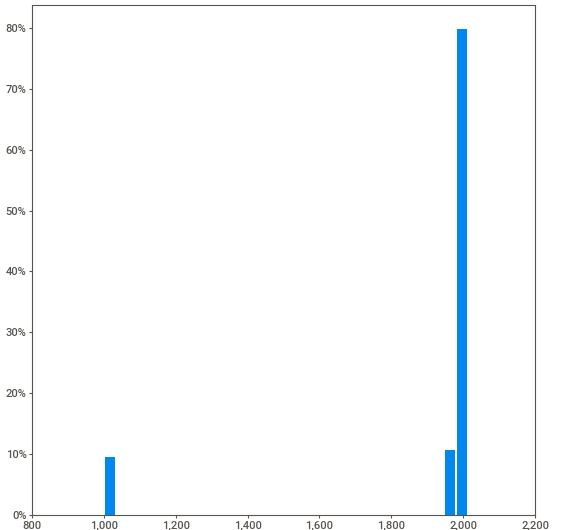
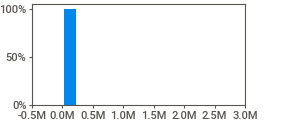
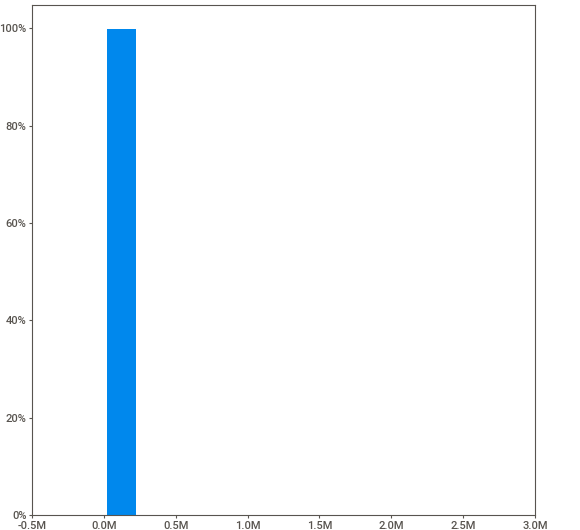
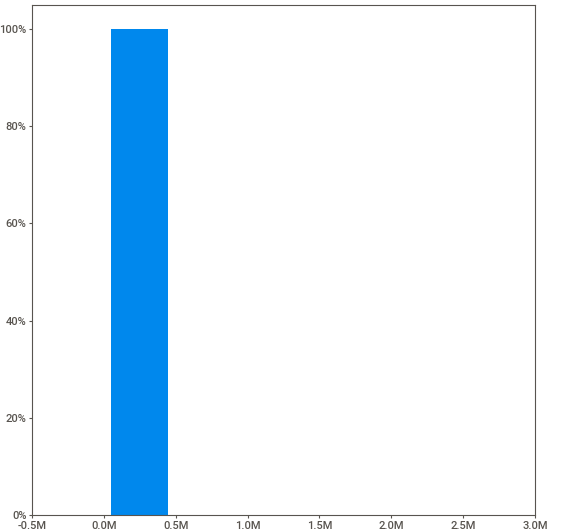
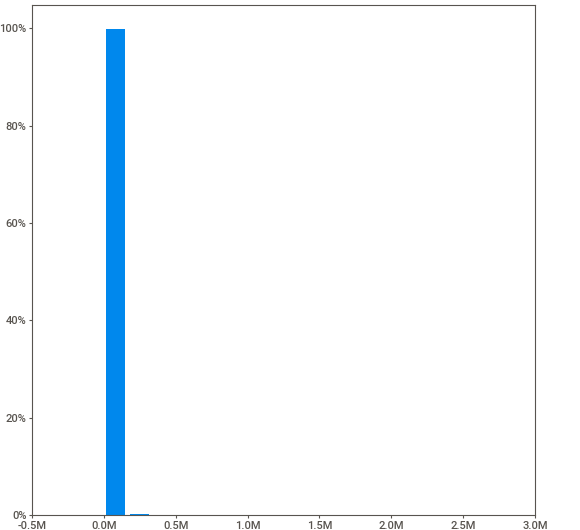
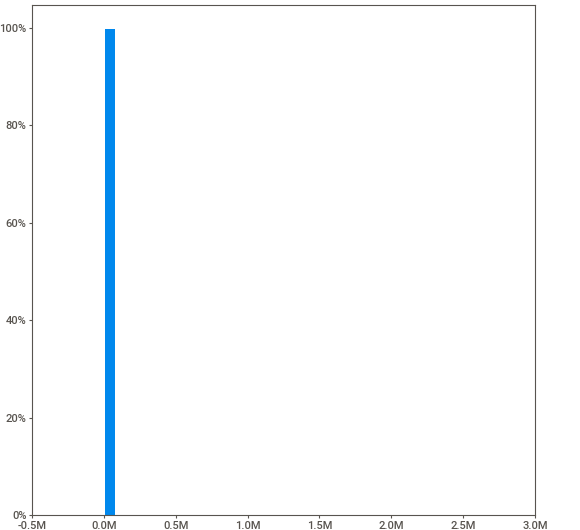
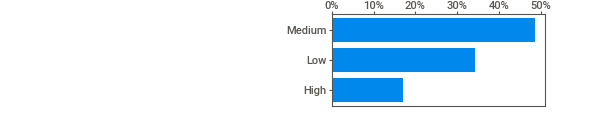
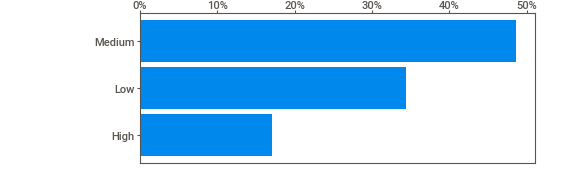
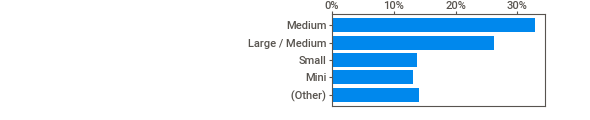
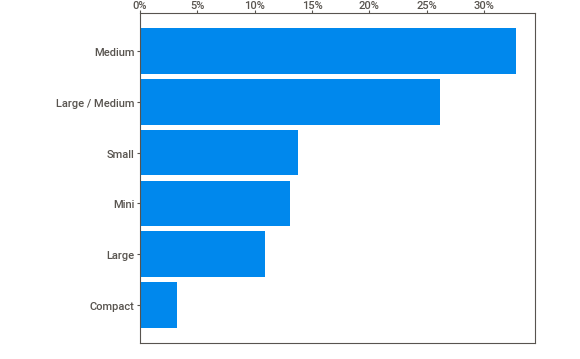
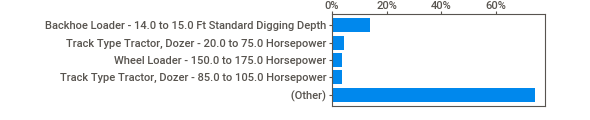
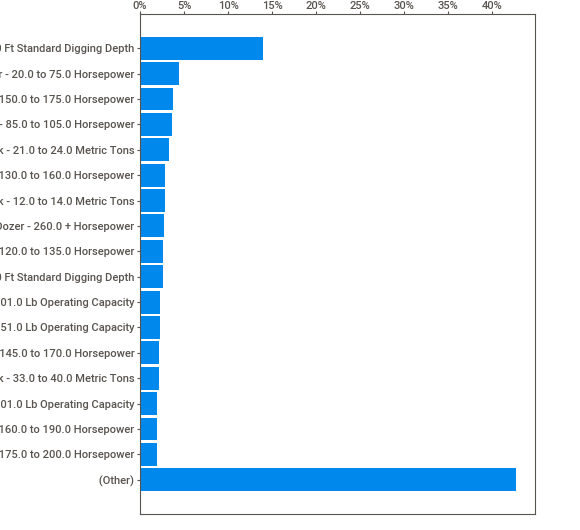
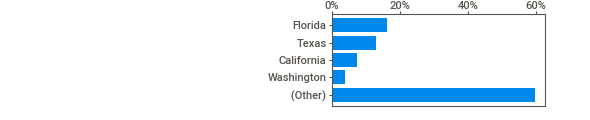
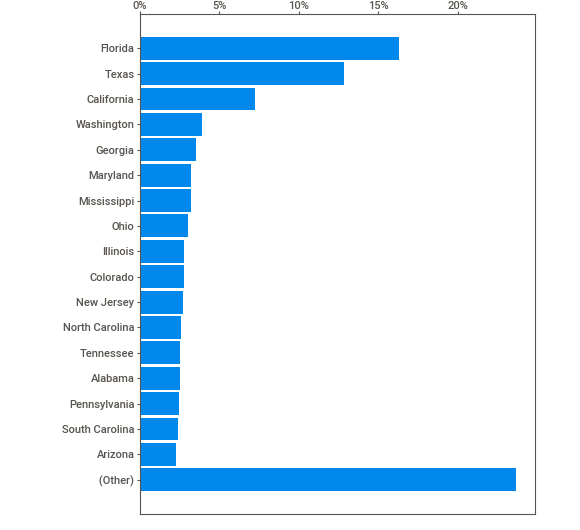
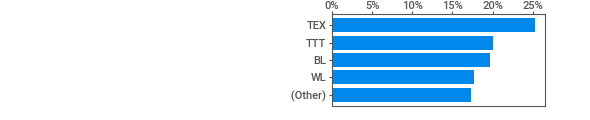
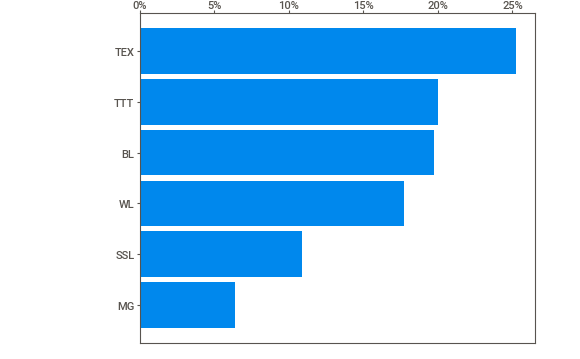
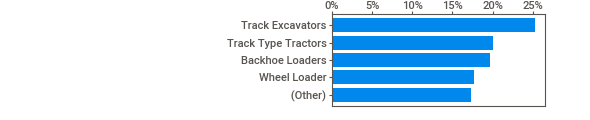
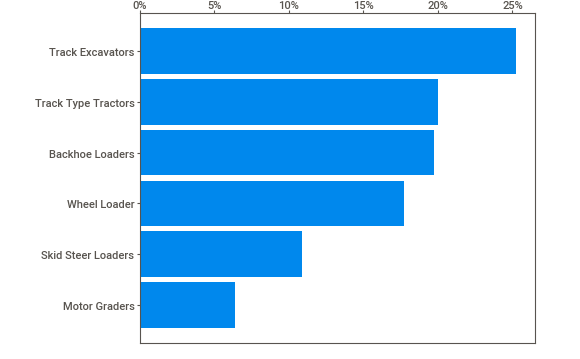
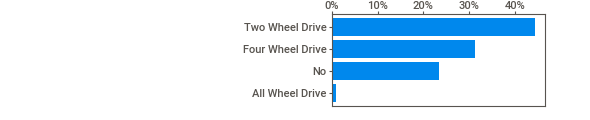
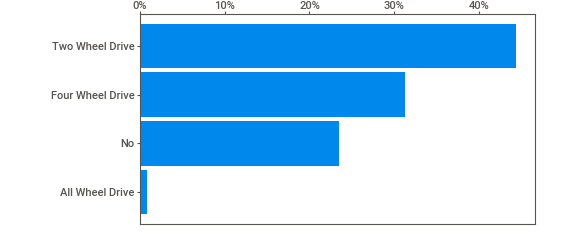
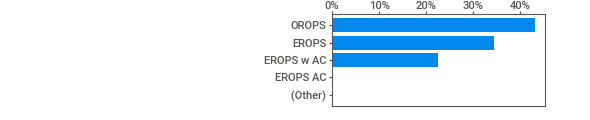
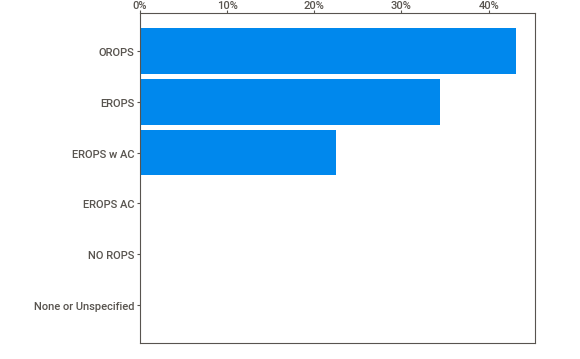
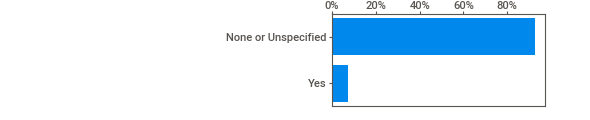
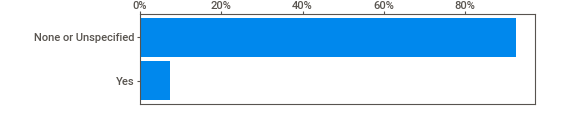
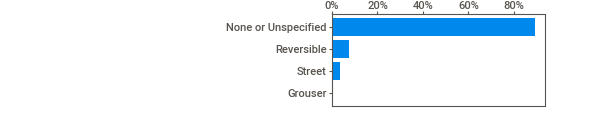
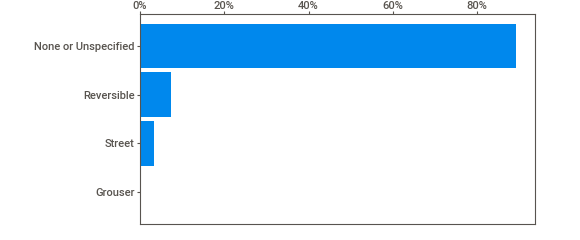
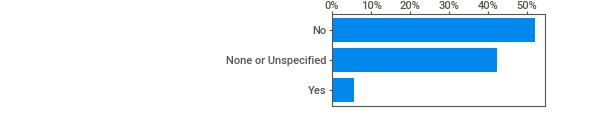
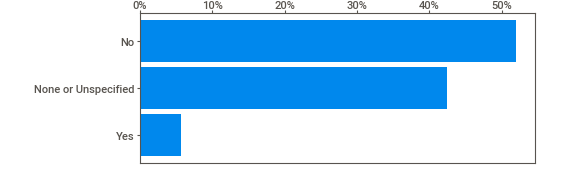
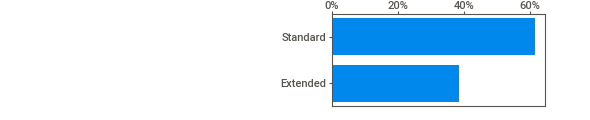
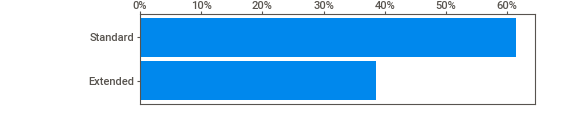
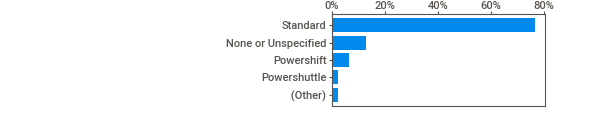
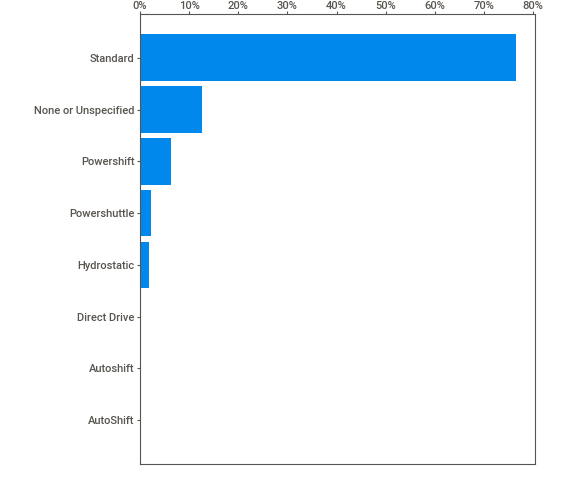
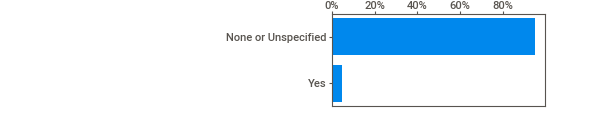
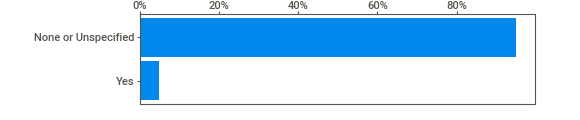
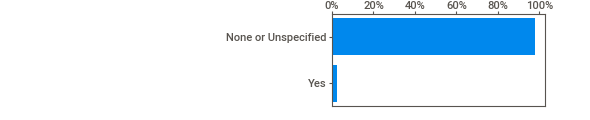
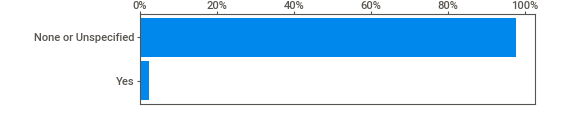
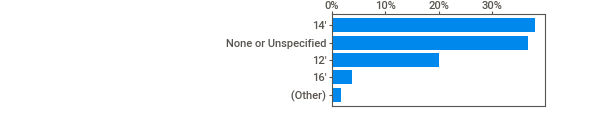
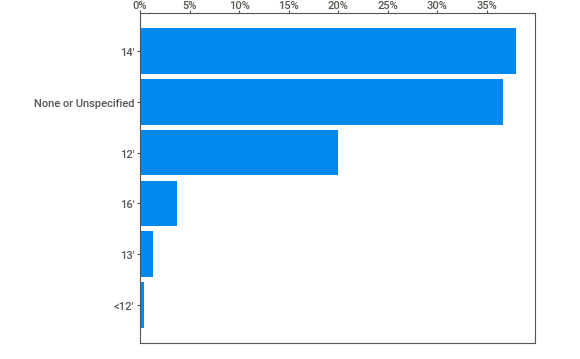
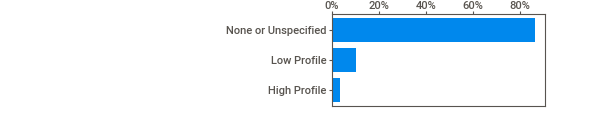
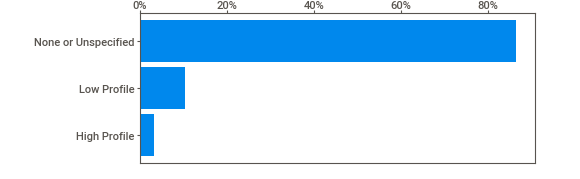
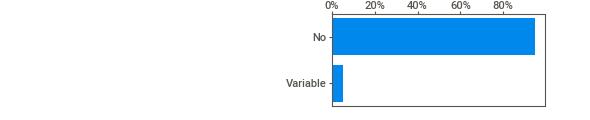
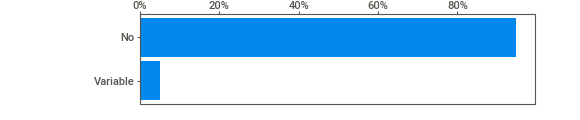
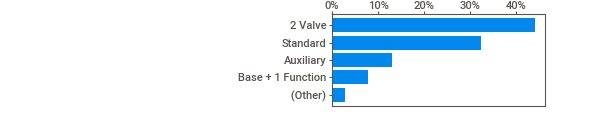
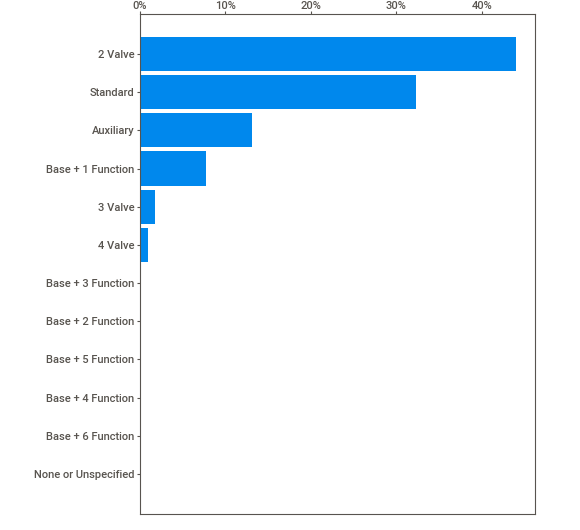
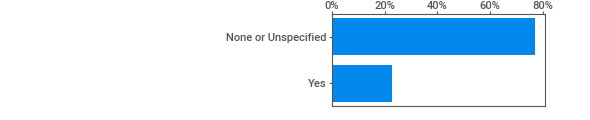
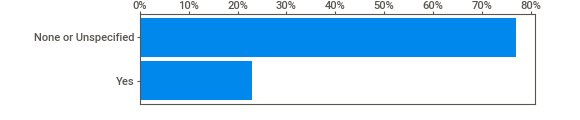
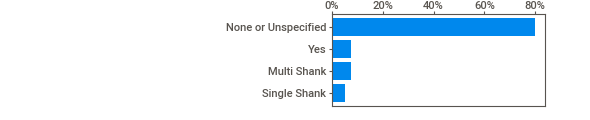
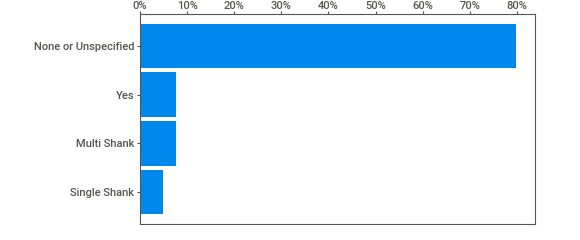
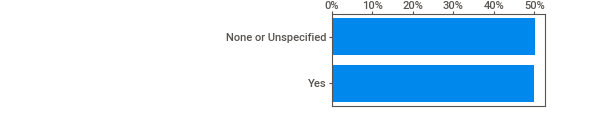
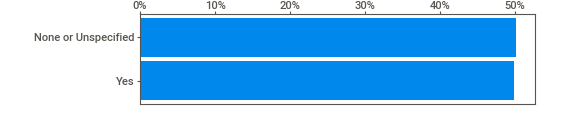
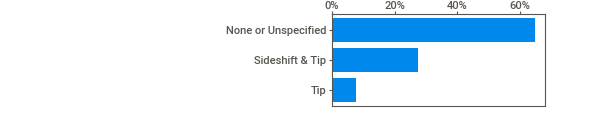
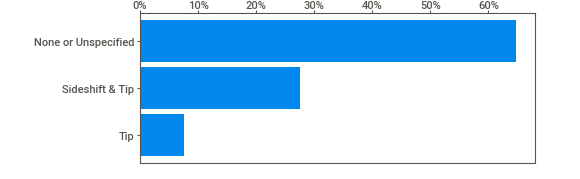
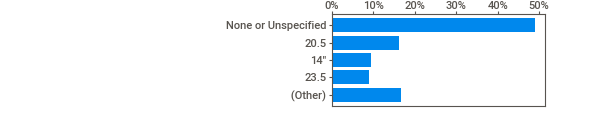
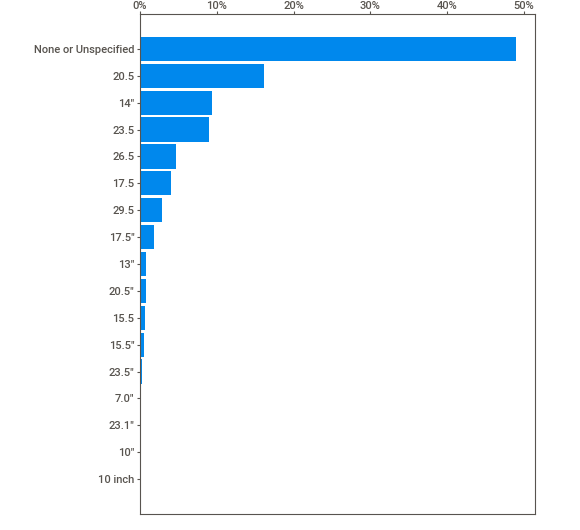
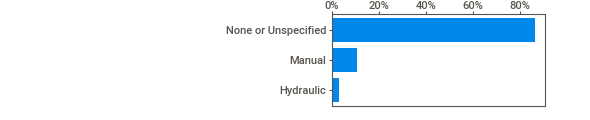
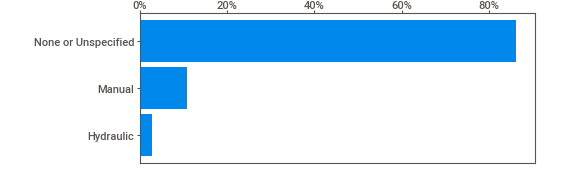
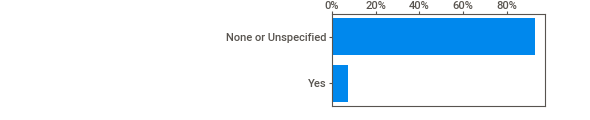
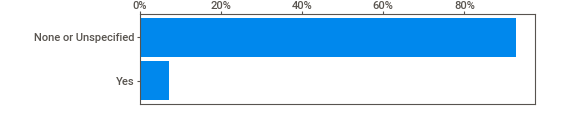
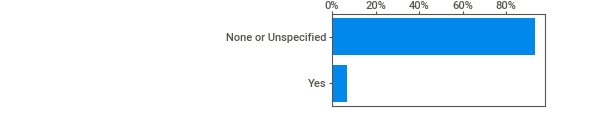
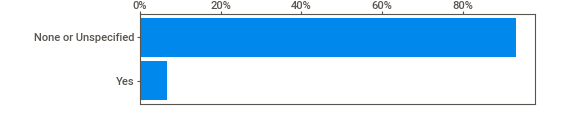
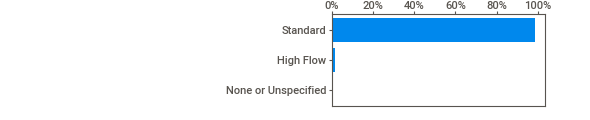
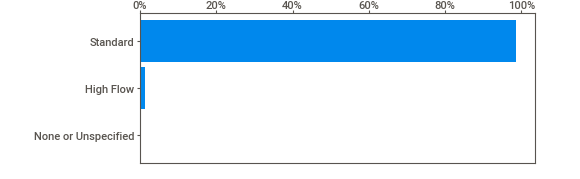
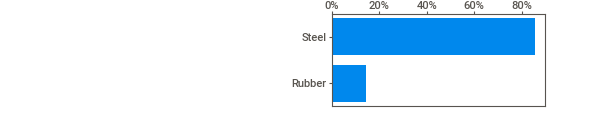
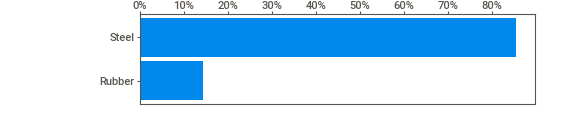
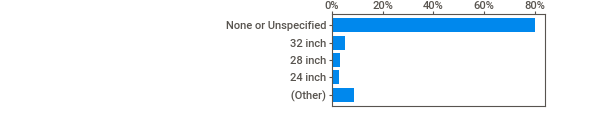
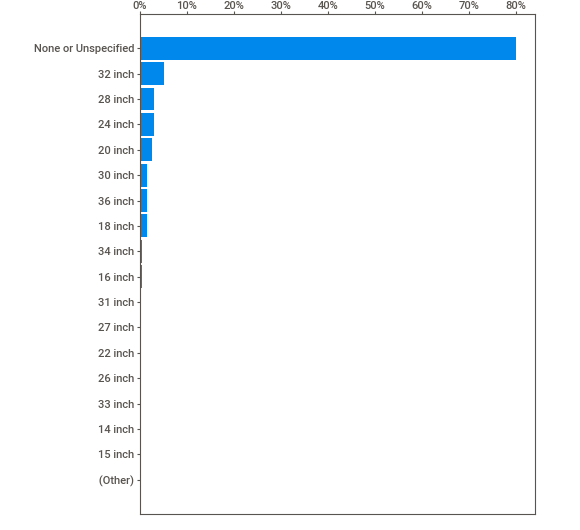
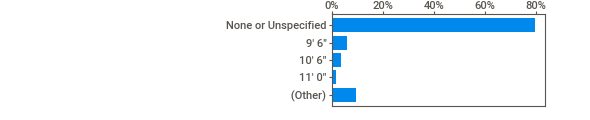
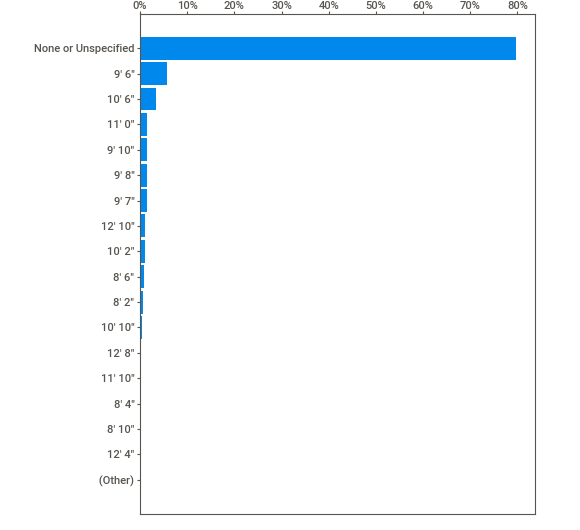
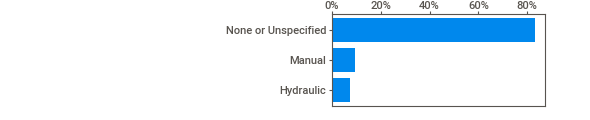
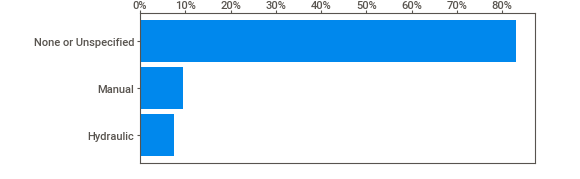
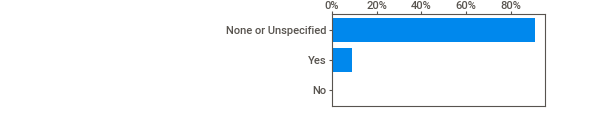
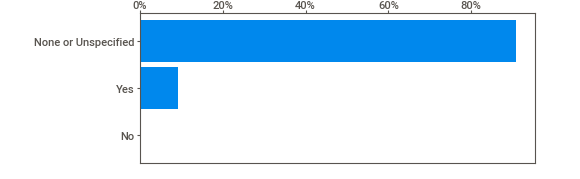
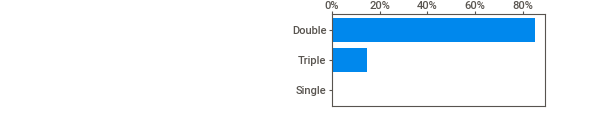
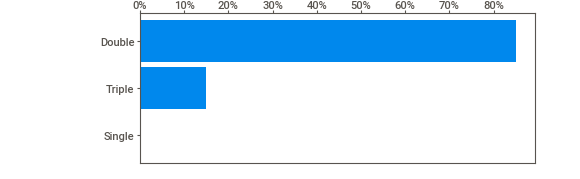
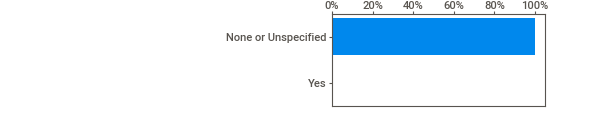
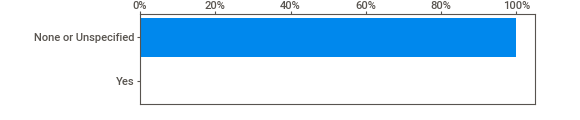
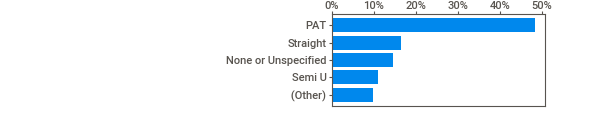
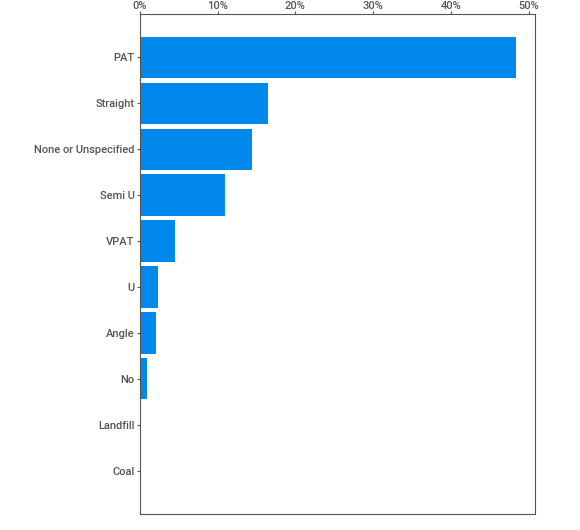
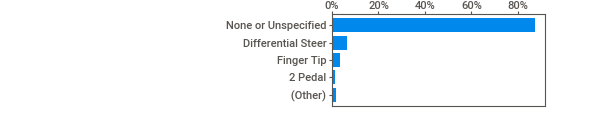
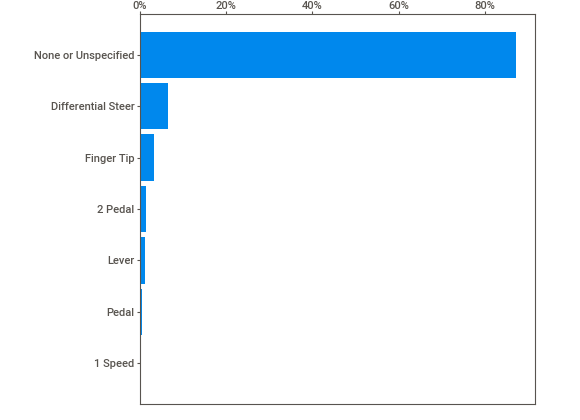
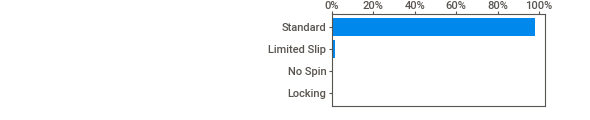
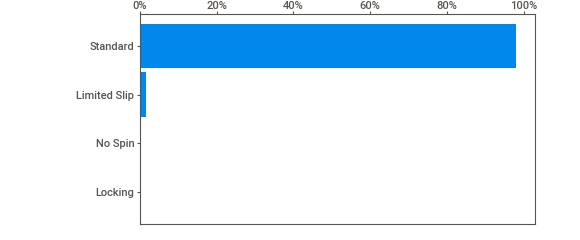
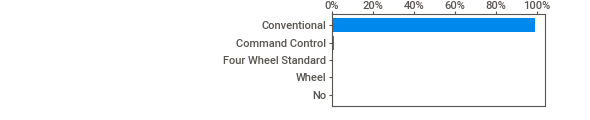
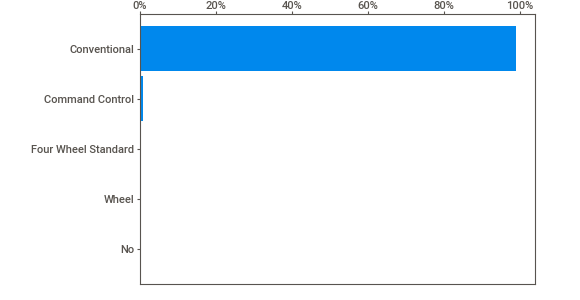
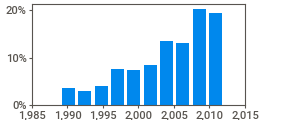
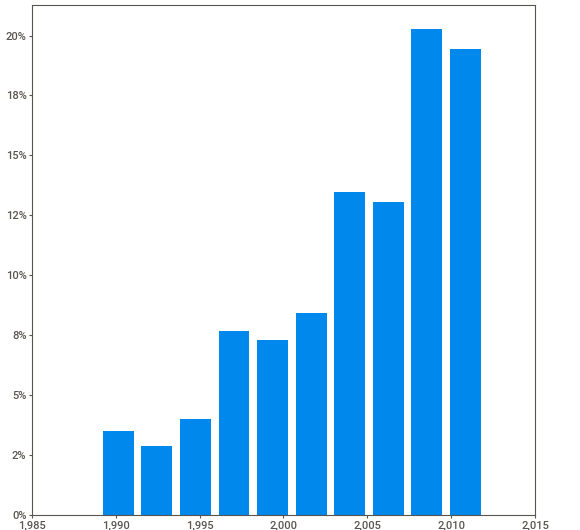
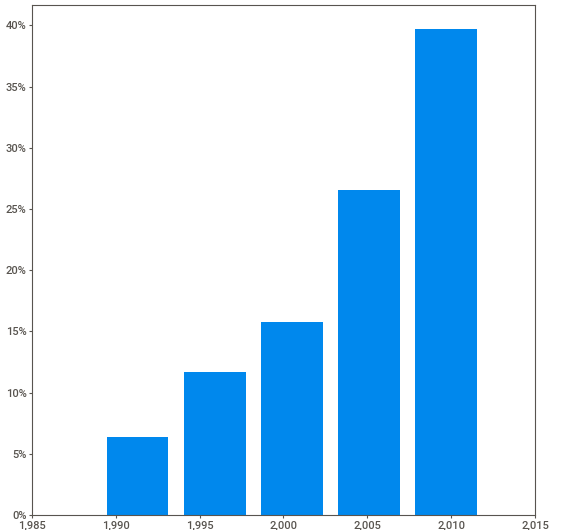
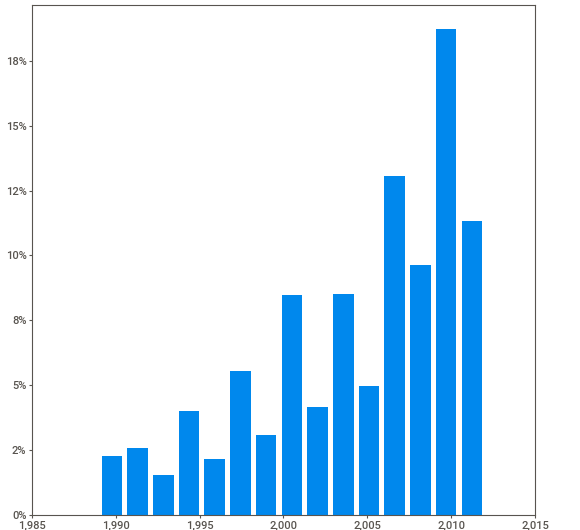
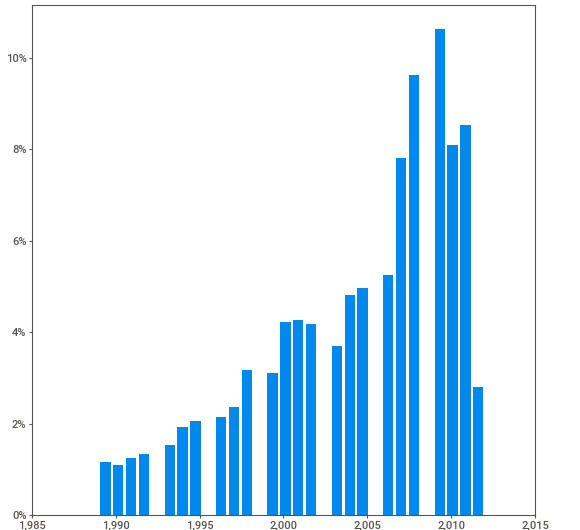
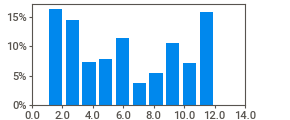
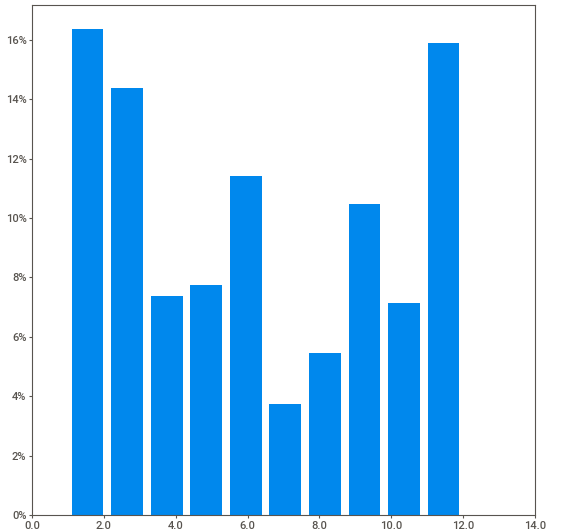
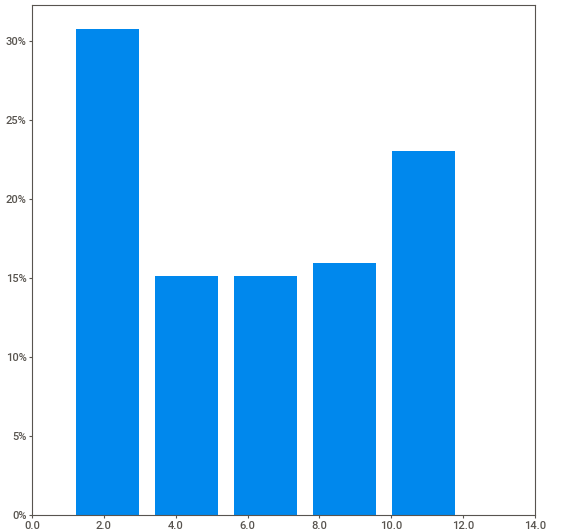
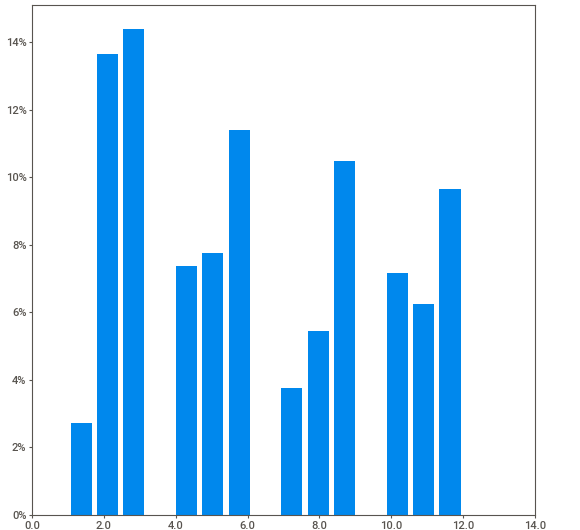
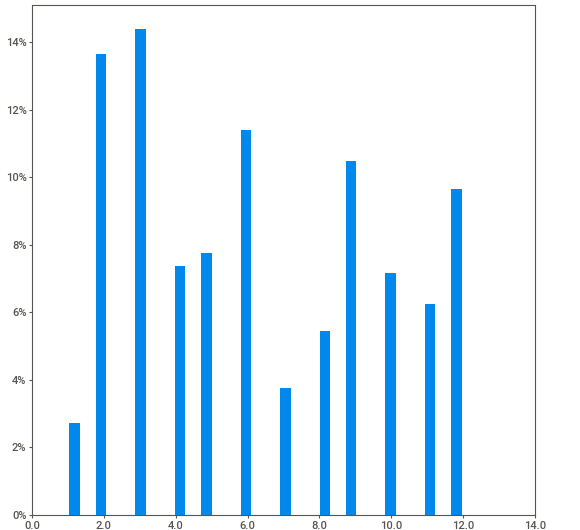
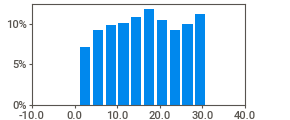
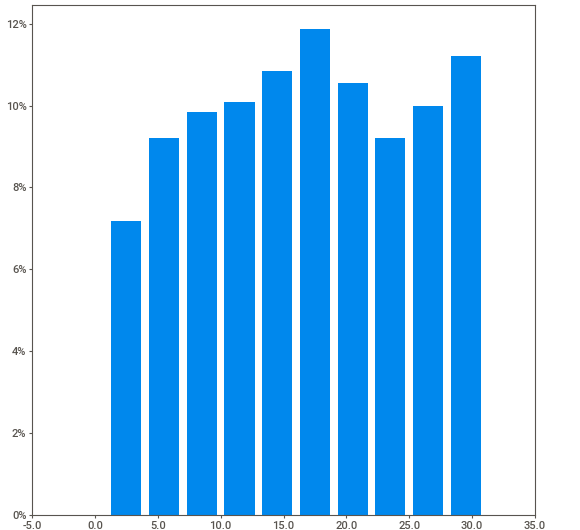
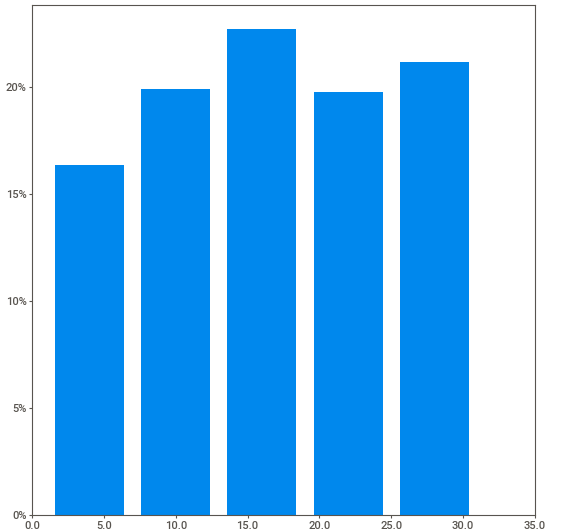
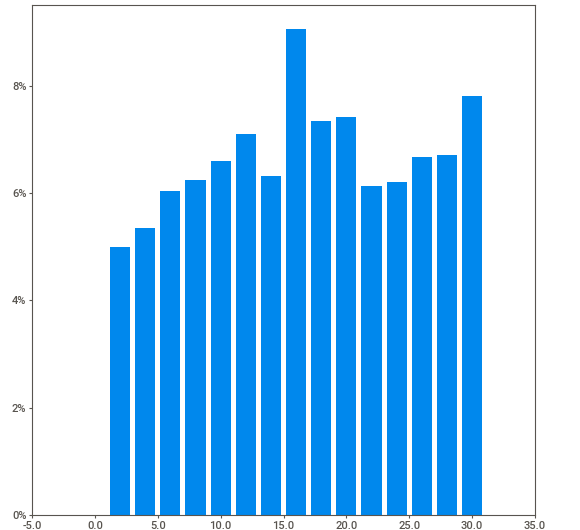
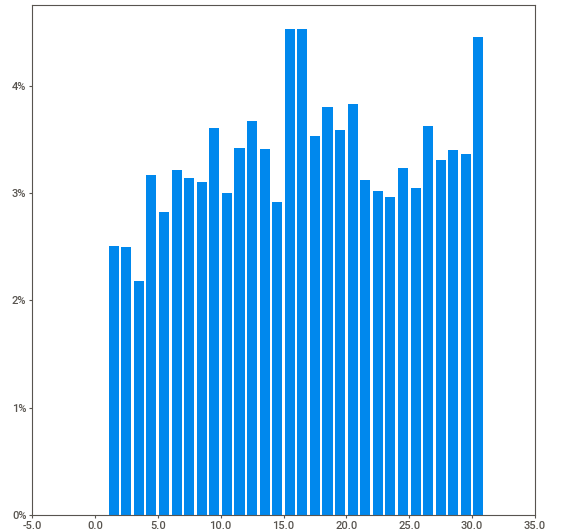
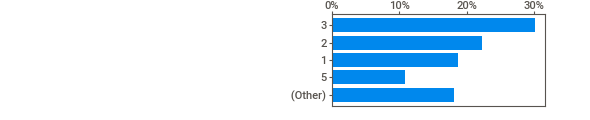
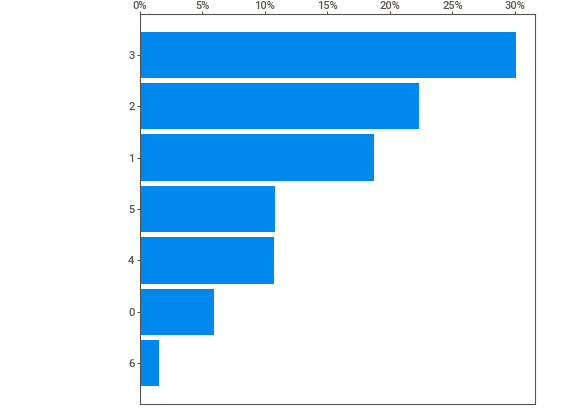
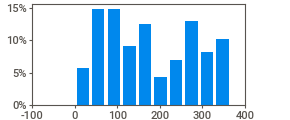
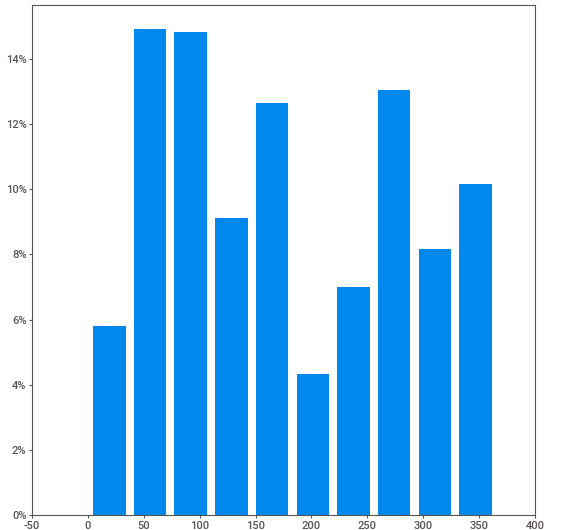
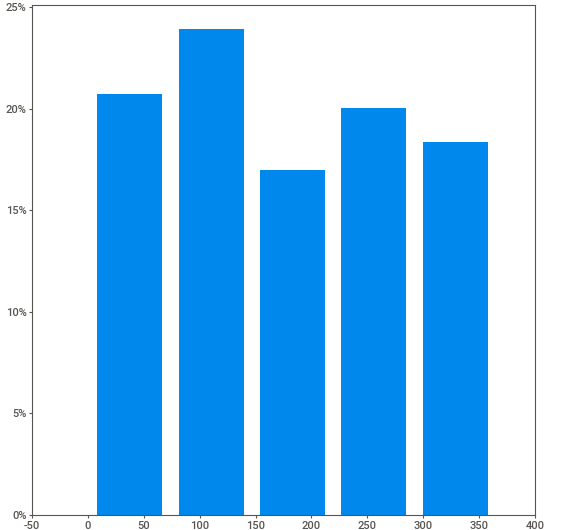
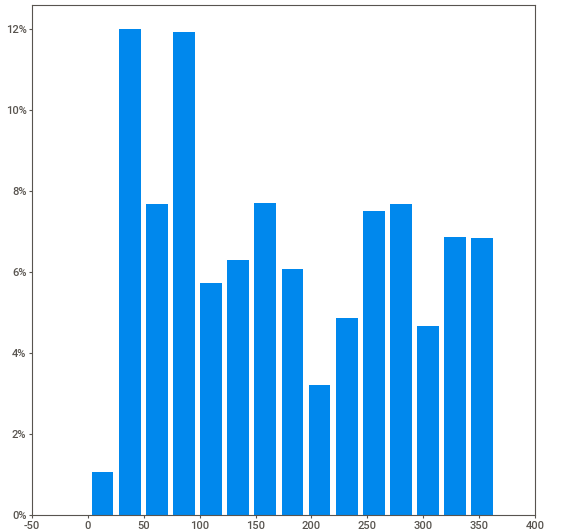
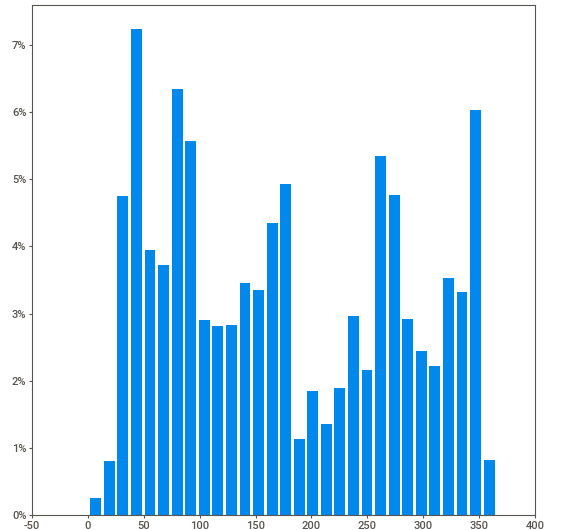
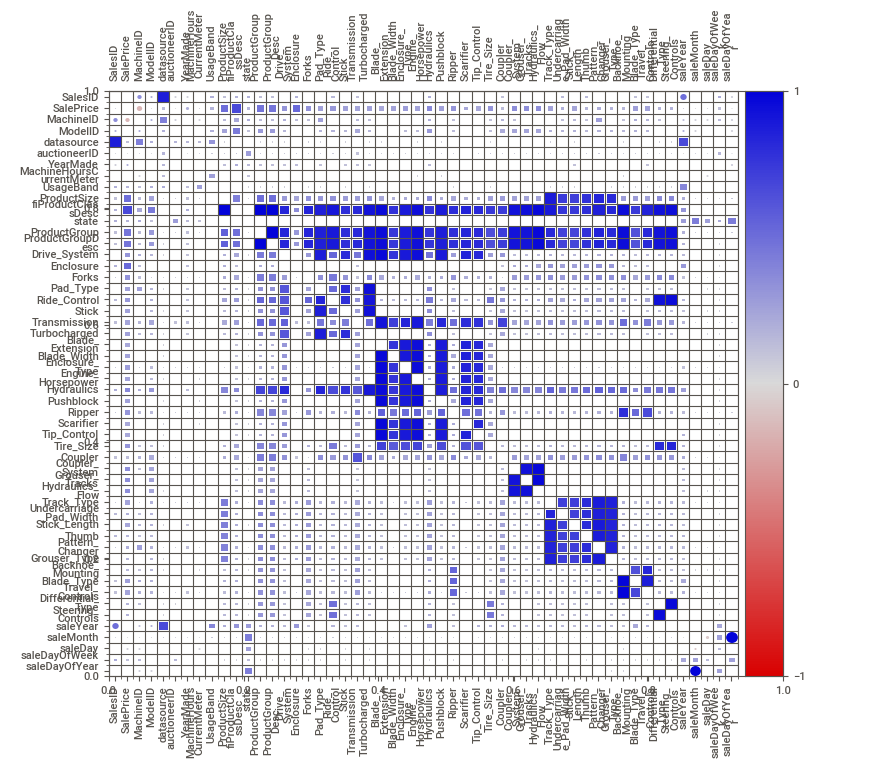
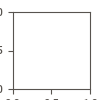

In [21]:
import sweetviz as sv

eda_report = sv.analyze(df_tmp)
eda_report.show_notebook()


### Model Driven EDA
We've done EDA with univariate analysis by sweetviz. now try to do some model driven EDA

In [22]:
df_tmp.head().T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                                         None or Unspecified   
Differential_Type                       

In [23]:
categorical_columns = df_tmp.select_dtypes(include='O').columns
categorical_columns

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [24]:
df_tmp[categorical_columns] = df_tmp[categorical_columns].astype('category')

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [26]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [28]:
numerical_columns = df_tmp.select_dtypes('number').columns
numerical_columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype='object')

### Handling missing values
remove that columns which has missing value more than 50% . and within 50% missing values, we'll fill it up with mean, median , mode, whatever it needs

In [29]:
missing_percentage = (df_tmp.isnull().sum()/len(df_tmp))*100
missing_percentage

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

In [30]:
more_missing_columns = missing_percentage[missing_percentage>50]
more_missing_columns

MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
Drive_System                74.051970
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged                80.349796
Blade_Extension             93.704113
Blade_Width                 93.704113
Enclosure_Type              93.704113
Engine_Horsepower           93.704113
Pushblock                   93.704113
Ripper                      74.086378
Scarifier                   93.701448
Tip_Control                 93.704113
Tire_Size                   76.341538
Coupler_System              89.102443
Grouser_Tracks              89.126431
Hydraulics_Flow             89.126431
Track_Type                  75.237825
Undercarriage_Pad_Width     75.062637
Stick_Length

In [31]:
len(more_missing_columns)

35

In [32]:
df_tmp2 = df_tmp.copy()
df_tmp2 = df_tmp2.drop(df_tmp[more_missing_columns.keys()], axis=1)

In [33]:
missing_columns = (df_tmp2.isnull().sum()/len(df_tmp2))*100
missing_columns

SalesID                0.000000
SalePrice              0.000000
MachineID              0.000000
ModelID                0.000000
datasource             0.000000
auctioneerID           4.879113
YearMade               0.000000
fiModelDesc            0.000000
fiBaseModel            0.000000
fiSecondaryDesc       34.099269
fiProductClassDesc     0.000000
state                  0.000000
ProductGroup           0.000000
ProductGroupDesc       0.000000
Enclosure              0.080931
Hydraulics            20.006155
Coupler               46.527727
saleYear               0.000000
saleMonth              0.000000
saleDay                0.000000
saleDayOfWeek          0.000000
saleDayOfYear          0.000000
dtype: float64

In [34]:
missing_columns = missing_columns[missing_columns>0]
missing_columns

auctioneerID        4.879113
fiSecondaryDesc    34.099269
Enclosure           0.080931
Hydraulics         20.006155
Coupler            46.527727
dtype: float64

In [35]:
df_tmp2['auctioneerID'].dtypes, df_tmp2['fiSecondaryDesc'].dtypes, df_tmp2['Enclosure'].dtypes, df_tmp2['Hydraulics'].dtypes, df_tmp2['Coupler'].dtypes

(dtype('float64'),
 CategoricalDtype(categories=[' MSR SPIN ACE', '#NAME?', '-2', '-3', '-5', '-5L', '-6',
                   '-7', '0.7', '1',
                   ...
                   'XP', 'XT', 'Z', 'ZF', 'ZHS', 'ZHS G', 'ZT', 'ZTM', 'ZTS',
                   'ZX'],
 , ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['EROPS', 'EROPS AC', 'EROPS w AC', 'NO ROPS',
                   'None or Unspecified', 'OROPS'],
 , ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['2 Valve', '3 Valve', '4 Valve', 'Auxiliary',
                   'Base + 1 Function', 'Base + 2 Function',
                   'Base + 3 Function', 'Base + 4 Function',
                   'Base + 5 Function', 'Base + 6 Function',
                   'None or Unspecified', 'Standard'],
 , ordered=False, categories_dtype=object),
 CategoricalDtype(categories=['Hydraulic', 'Manual', 'None or Unspecified'], ordered=False, categories_dtype=object))

In [36]:
df_tmp2['auctioneerID'] = df_tmp2['auctioneerID'].fillna(df_tmp2['auctioneerID'].median())
df_tmp2['auctioneerID'].isnull().sum()

0

In [37]:
mode_value = df_tmp2['fiSecondaryDesc'].mode()[0]  # Get the first mode value (assuming it's the most frequent)
df_tmp2['fiSecondaryDesc'] = df_tmp2['fiSecondaryDesc'].fillna(mode_value)
print(df_tmp2['fiSecondaryDesc'].isnull().sum())


0


In [38]:
mode_value = df_tmp2['Enclosure'].mode()[0]  # Get the first mode value (assuming it's the most frequent)
df_tmp2['Enclosure'] = df_tmp2['Enclosure'].fillna(mode_value)
print(df_tmp2['Enclosure'].isnull().sum())

0


In [39]:
mode_value = df_tmp2['Hydraulics'].mode()[0]  # Get the first mode value (assuming it's the most frequent)
df_tmp2['Hydraulics'] = df_tmp2['Hydraulics'].fillna(mode_value)
print(df_tmp2['Hydraulics'].isnull().sum())

0


In [40]:
mode_value = df_tmp2['Coupler'].mode()[0]  # Get the first mode value (assuming it's the most frequent)
df_tmp2['Coupler'] = df_tmp2['Coupler'].fillna(mode_value)
print(df_tmp2['Coupler'].isnull().sum())

0


In [41]:
df_tmp2.isnull().sum()/len(df_tmp2)

SalesID               0.0
SalePrice             0.0
MachineID             0.0
ModelID               0.0
datasource            0.0
auctioneerID          0.0
YearMade              0.0
fiModelDesc           0.0
fiBaseModel           0.0
fiSecondaryDesc       0.0
fiProductClassDesc    0.0
state                 0.0
ProductGroup          0.0
ProductGroupDesc      0.0
Enclosure             0.0
Hydraulics            0.0
Coupler               0.0
saleYear              0.0
saleMonth             0.0
saleDay               0.0
saleDayOfWeek         0.0
saleDayOfYear         0.0
dtype: float64

In [42]:
pd.Categorical(df_tmp2['Hydraulics']).codes

array([0, 0, 0, ..., 3, 4, 0], dtype=int8)

In [43]:
for col in df_tmp2.columns:
    if df_tmp2[col].dtype == 'category':
        df_tmp2[col] = pd.Categorical(df_tmp2[col]).codes 

In [44]:
df_tmp2.head().T

205615     274835     141296     212552     62755 
SalesID             1646770.0  1821514.0  1505138.0  1671174.0  1329056.0
SalePrice              9500.0    14000.0    50000.0    16000.0    22000.0
MachineID           1126363.0  1194089.0  1473654.0  1327630.0  1336053.0
ModelID                8434.0    10150.0     4139.0     8591.0     4089.0
datasource              132.0      132.0      132.0      132.0      132.0
auctioneerID             18.0       99.0       99.0       99.0       99.0
YearMade               1974.0     1980.0     1978.0     1980.0     1984.0
fiModelDesc            4592.0     1819.0     2347.0     1818.0     2118.0
fiBaseModel            1743.0      558.0      712.0      557.0      682.0
fiSecondaryDesc          30.0       30.0       58.0       30.0       20.0
fiProductClassDesc       46.0       59.0       49.0       73.0       50.0
state                    43.0        8.0        8.0        8.0        8.0
ProductGroup              4.0        5.0        4.0        5.0        4.0
ProductGroupDesc          4.0        5.0        4.0        5.0        4.0
Enclosure                 5.0        5.0        5.0        0.0        5.0
Hydraulics                0.0        0.0        0.0        0.0        0.0
Coupler                   2.0        2.0        2.0        2.0        2.0
saleYear               1989.0     1989.0     1989.0     1989.0     1989.0
saleMonth                 1.0        1.0        1.0        1.0        1.0
saleDay                  17.0       31.0       31.0       31.0       31.0
saleDayOfWeek             1.0        1.0        1.0        1.0        1.0
saleDayOfYear            17.0       31.0       31.0       31.0       31.0

### Model Building 
We've filled up the missing values for those columns which necessary and also covert categorical columns into numbers to build a model

In [45]:
# Split data into training and validation
df_train = df_tmp2[df_tmp2['saleYear'] != 2012 ]
df_val = df_tmp2[df_tmp2['saleYear'] == 2012]

len(df_train), len(df_val)

(401125, 11573)

In [46]:
# Split the data into X and y
X_train, y_train = df_train.drop('SalePrice', axis = 1), df_train['SalePrice']
X_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape 

((401125, 21), (401125,), (11573, 21), (11573,))

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

rf = model.fit(X_train, y_train)
rf 

RandomForestRegressor(n_jobs=-1, random_state=42)

### Building an evaluation function

In [48]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

### Hyperparameter tuning with Randomized Search CV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

# Different Random Forest Regressor Hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth":[None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features": [0.5, 1,'sqrt', "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
param_distributions=rf_grid,
n_iter=10,
cv=5,
verbose=True)

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Shoaib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shoaib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shoaib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_features': 0.5,
 'max_depth': None}

In [52]:
# Evaluate Randomized Search Model
show_scores(rs_model)

{'Training MAE': 4350.531960961921,
 'Valid MAE': 6553.595211453347,
 'Training RMSLE': 0.20777427369091328,
 'Valid RMSLE': 0.2745520078560313,
 'Training R^2': 0.9103006521190926,
 'Valid R^2': 0.8550375271209075}

### Train the model with the best hyperparameters

In [53]:
ideal_model = RandomForestRegressor(n_estimators=50,
                                    min_samples_split=14,
                                    min_samples_leaf=13,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_depth=None)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=13,
                      min_samples_split=14, n_estimators=50, n_jobs=-1)

In [54]:
show_scores(ideal_model)

{'Training MAE': 4358.495064921114,
 'Valid MAE': 6596.641741399694,
 'Training RMSLE': 0.20786683802145084,
 'Valid RMSLE': 0.2763779085888594,
 'Training R^2': 0.9098487333684002,
 'Valid R^2': 0.8544364708668276}